# $U_1$ bounds

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors

import scipy
import scipy.optimize as optimizejsn
import scipy.interpolate as interpolejsn

The style that we use:

In [2]:
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = ['serif']
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18

plt.rcParams['figure.dpi'] = 70

If one wants to set matplotlib back to default settings, run the following line of code:

In [3]:
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

Some nice colors:

In [4]:
niceGreenColors = ['#55a15c', '#87c27e','#add7a1'] 
niceGreenLine = ['#284c2b']

flavioColors = ['#df9695', '#e9b8b8', '#f3dcdc']
flavioLine = ['#c63d35']

niceBlueColors = ['#3182bd','#6baed6','#9ecae1']
niceBlueColorForLine = ['#316e96']

niceOrangeColors = ['#ff5f00', '#ff7726', '#923600']

lo_color = '#009DCF' #for the plot #1
nlo_color = '#004F92'

purpleColors = ['#35377e', '#4e50a7', '#7c7eb7']

#cmsBrown = '#b86551'

cmsBrown = '#73534b'

orangeGinobetaR0 = '#fadfc2' #betaR = 0
purpleGinobetaR1 = '#d9bfdc' #betaR = 1
tab20cblue = plt.cm.tab20c(0)

No need to digitize plots, as we have everything on HEPdata:
https://www.hepdata.net/record/ins2687527

# Heavy-quark scenario, recasting Fig. 2 and Fig. 3 - DEPRECATED

In [5]:
limits_x_from_plot = np.array([600, 612.2905028, 627.9329609, 644.6927374, 658.1005587, 672.6256983, 690.5027933,
705.027933, 717.3184358, 729.6089385, 744.1340782, 756.424581, 766.4804469, 781.0055866, 793.2960894, 810.0558659, 831.2849162,
856.9832402, 882.6815642, 909.4972067, 951.9553073, 993.2960894, 1023.463687, 1051.396648, 1077.094972, 1101.675978,
1131.843575, 1166.480447, 1195.530726, 1226.815642, 1260.335196, 1289.385475, 1322.905028, 1349.72067, 1392.178771,
1421.22905, 1454.748603, 1500.558659, 1535.195531, 1562.011173, 1594.413408, 1626.815642, 1664.804469, 1700.558659,
1738.547486, 1792.178771, 1827.932961, 1874.860335, 1930.726257, 2000])

We will extrapolate the bounds, so take some other values of x:

In [6]:
limits_x_extrapolated = np.arange(2200, 5000, 200)

Put them together:

In [7]:
limits_x = np.append(limits_x_from_plot, limits_x_extrapolated)

The expected bounds (central value) curve:

In [8]:
expected_central_limits_y_from_plot = np.array([0.141988558, 0.130530664, 0.117994994, 0.105769521, 0.095611817, 0.086429621,
0.075543538, 0.068288623, 0.062778011, 0.05722854, 0.051732528, 0.047159459, 0.044089602, 0.039521474, 0.036639236, 0.033400389,
0.030964552, 0.028465839, 0.026389871, 0.024057051, 0.021204654, 0.018533861, 0.016753939, 0.015663337,0.014521035, 0.013575784,
0.012480274, 0.011377039, 0.010458958, 0.009860748, 0.00921886, 0.008691579, 0.008194455, 0.007791043, 0.007162338, 0.006809737,
0.006474494, 0.006053035, 0.005706826, 0.005471725, 0.005246309, 0.005030179, 0.004863704, 0.004702738, 0.004509002, 0.004287024,
0.004145144, 0.003941079, 0.00374706, 0.003473793])

For the bounds, take the last value (as discussed with the CMS experimentalists):

In [9]:
expected_central_limits_y_extrapolated = np.array([0.003473793]*len(limits_x_extrapolated))

Add it together:

In [10]:
expected_central_limits_y = np.append(expected_central_limits_y_from_plot, expected_central_limits_y_extrapolated)

The expected +$1 \sigma$ curve:

In [11]:
expected_plusonesigma_limits_y_from_plot = np.array([0.203881963, 0.185859139, 0.166602256, 0.148089324, 0.134998476, 0.119997374,
0.105769521, 0.095611817, 0.087896335, 0.080803461, 0.073043403, 0.067716464, 0.061730443, 0.055802085, 0.051299085, 0.047557925,
0.044089602, 0.040874218, 0.037261005, 0.034254195, 0.029939771, 0.025732088, 0.023065984, 0.021564497, 0.020160751, 0.018848381,
0.017327394, 0.015929144, 0.014643728, 0.013806166, 0.01290745, 0.012169196, 0.011570107, 0.011000512, 0.010371327, 0.009696203,
0.00914162, 0.008618756, 0.008194455, 0.007725766, 0.007470079, 0.007162338, 0.006809737, 0.00664, 0.006366455, 0.006053035, 0.005852708,
0.005611597, 0.005335339, 0.004904799])

In [12]:
expected_plusonesigma_limits_y = np.append(expected_plusonesigma_limits_y_from_plot, [0.004904799]*len(limits_x_extrapolated))

The expected $+2\sigma$ curve:

In [13]:
expected_plustwosigma_limits_y_from_plot = np.array([0.273697998, 0.249503554, 0.225542179, 0.198800085, 0.181226491, 0.162449596,
0.141988558, 0.128352516, 0.117994994, 0.108473281, 0.098884425, 0.08938794, 0.083569208, 0.07618183, 0.068865616, 0.06438279,
0.059687456, 0.054411185, 0.050869274, 0.045983982, 0.040192155, 0.03483549, 0.031756091, 0.02968892, 0.027756312, 0.026168763,
0.023855488, 0.021564497, 0.019991833, 0.019007637, 0.01777033, 0.016895499, 0.015795681, 0.015144954, 0.013922819, 0.01312649,
0.012480274, 0.011766453, 0.011093459, 0.010726318, 0.010112816, 0.00977813, 0.009375305, 0.00914162, 0.008839075, 0.008333516,
0.008125798, 0.007725766, 0.00734542, 0.006696104])

In [14]:
expected_plustwosigma_limits_y = np.append(expected_plustwosigma_limits_y_from_plot, [0.006696104]*len(limits_x_extrapolated))

The expected $-1 \sigma$ curve:

In [15]:
expected_minusonesigma_limits_y_from_plot = np.array([0.101412184, 0.093228636, 0.084275311, 0.074910594, 0.067716464, 0.060700355,
0.053503233, 0.047159459, 0.044089602, 0.039855404, 0.036027842, 0.033120543, 0.030964552, 0.028227337, 0.025732088, 0.024057051,
0.022681085, 0.020160751, 0.018378574, 0.017038254, 0.014892232, 0.01290745, 0.011865871, 0.011000512, 0.010284431, 0.009614963,
0.008839075, 0.007923258, 0.007345427, 0.006925298, 0.006474494, 0.006155756, 0.005803671, 0.005471725, 0.005030179, 0.004782544,
0.0045471, 0.004251105, 0.004041824, 0.003875314, 0.003684533, 0.003532743, 0.003387206, 0.003330684, 0.003166715, 0.003010818,
0.002935772, 0.002791244, 0.002609547, 0.002460292])

In [16]:
expected_minusonesigma_limits_y = np.append(expected_minusonesigma_limits_y_from_plot, [0.002460292]*len(limits_x_extrapolated))

The expected $-2\sigma$ curve:

In [17]:
expected_minustwosigma_limits_y_from_plot = np.array([0.075543538, 0.071824537, 0.063843357, 0.056749049, 0.052169633, 0.046764332,
0.040874218, 0.037261005, 0.0336826, 0.030705114, 0.027523754, 0.024880477, 0.023457415, 0.021383819, 0.019330198, 0.017920477,
0.016753939, 0.015401965, 0.013922819, 0.012799304, 0.011187191, 0.010028085, 0.009065026, 0.008403928, 0.007791043, 0.007283883,
0.006696104, 0.00600232, 0.005611597, 0.005290636, 0.004988033, 0.004663336, 0.004359775, 0.004145144, 0.003842845, 0.003653662,
0.003444687, 0.003220455, 0.003036258, 0.002911174, 0.002744667, 0.002676254, 0.002544503, 0.002460292, 0.002378868, 0.002261756,
0.002186903, 0.002061821, 0.001960318, 0.001848195])

In [18]:
expected_minustwosigma_limits_y = np.append(expected_minustwosigma_limits_y_from_plot, [0.001848195]*len(limits_x_extrapolated))

Check:

In [19]:
len(expected_central_limits_y) == len(expected_plusonesigma_limits_y) == len(expected_plustwosigma_limits_y) ==  len(expected_minusonesigma_limits_y) == len(expected_minustwosigma_limits_y) == len(limits_x)

True

Interpolate the functions:

In [20]:
funkPlusTwoSigma =  interpolejsn.interp1d(limits_x, expected_plustwosigma_limits_y, kind = "linear")
funkPlusOneSigma =  interpolejsn.interp1d(limits_x, expected_plusonesigma_limits_y, kind = "linear")
funkCentral =       interpolejsn.interp1d(limits_x, expected_central_limits_y, kind = "linear")
funkMinusOneSigma = interpolejsn.interp1d(limits_x, expected_minusonesigma_limits_y, kind = "linear")
funkMinusTwoSigma = interpolejsn.interp1d(limits_x, expected_minustwosigma_limits_y, kind = "linear")

The observed limits and the theoretical curve:

In [21]:
obs_limits_x = np.array([600, 800, 1000, 1200, 1400, 1600, 2000, 3000, 4000, 5000])
obs_limits_y = np.array([0.1468, 0.0400, 0.0244, 0.0151, 0.0109, 0.00505, 0.00299, 0.00299, 0.00299, 0.00299])

funkObserved = interpolejsn.CubicSpline(obs_limits_x, obs_limits_y)

theory_scalarLQ_CMS_y = np.array([0.08918, 0.0268, 0.00956, 0.003952, 0.001787, 0.00086309, 0.0002429])
theory_scalarLQ_900_1600_y = np.array([0.01600, 0.000863]) #From the CMS paper

Re-plot the CMS picture:

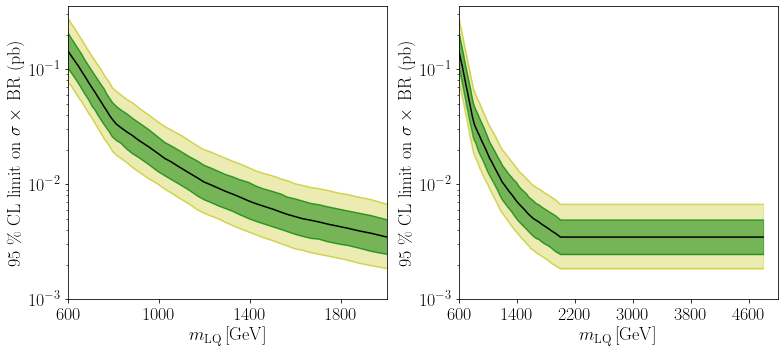

In [22]:
fig, ax = plt.subplots(1,2, figsize=(11, 5))
for i in range(2):
    ax[i].plot(limits_x, funkCentral(limits_x),        color = 'k', alpha = 1)
    ax[i].plot(limits_x, funkMinusTwoSigma(limits_x),  color = 'y', alpha=0.5)
    ax[i].plot(limits_x, funkMinusOneSigma(limits_x),  color = 'g', alpha=0.5)
    ax[i].plot(limits_x, funkPlusOneSigma(limits_x),   color = 'g', alpha=0.5)
    ax[i].plot(limits_x, funkPlusTwoSigma(limits_x),   color = 'y', alpha=0.5)

    ax[i].fill_between(limits_x, funkMinusTwoSigma(limits_x), funkPlusTwoSigma(limits_x), alpha=0.3, color='y')
    ax[i].fill_between(limits_x, funkMinusOneSigma(limits_x), funkPlusOneSigma(limits_x), alpha=0.5, color='g')

    ax[i].set_yscale('log')

    #ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    #ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    ax[i].set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 18)
    ax[i].set_ylabel(r" 95 \% CL limit on $ \sigma \times \, \mathrm{BR} $ (pb)", fontsize = 18)
    ax[i].set_yticks([1e-3, 1e-2, 1e-1])

    #ax.set_title(r"CMS Recast")
    #ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax[0].set_xticks([600 + i*400 for i in range(11)])
ax[0].set_xlim(600, 2000) 

ax[1].set_xticks([600 + i*800 for i in range(6)])
ax[1].set_xlim(600, 5000)

fig.tight_layout()
#fig.savefig("cms_lq_recast_btau.pdf")
plt.show()
plt.close()


### Recasting Fig. 3

The same limits should hold for different couplings (check the discussion with Nudžeim). The simple argument is that $\mu$ is alone "unstatistical", i.e. you can redefine $\mu$ to $\mu g^2$, this is what counts. Solving a $\chi^2$  amounts to solving an equation like $\mu g^2 = c$ for all bins, hence $\mu \sim 1/g^2$. Let us check this by digitizing Figure 3 and seeing that the bounds align with our bounds. 

The digitized curve that we get from CMS:

In [23]:
fig_3_x_solid = np.array([600, 625.891182, 657.7861163, 692.4953096, 726.2664165, 758.1613508, 790.9943715, 824.7654784, 865.1031895,
903.564728, 951.4071295, 994.5590994, 1036.772983, 1082.739212, 1108.067542, 1126.829268, 1148.405253, 
1167.166979, 1197.185741, 1227.204503, 1251.594747])

fig_3_y_solid = np.array([1.999134948, 1.900519031, 1.788927336, 1.708477509, 1.672145329, 1.669550173, 1.690311419, 1.742214533,
1.830449827, 1.905709343, 1.952422145, 1.996539792, 2.048442907, 2.136678201, 2.230103806, 2.339100346, 2.479238754, 2.60899654,
2.785467128, 2.907439446, 2.99567474])

fig_3_x_dashed = np.array([607.1294559, 730.0187617, 768.4803002, 797.5609756, 828.5178236, 866.0412758, 913.8836773, 941.0881801,
986.1163227, 1034.896811, 1074.296435, 1098.686679, 1124.953096, 1139.02439, 1169.043152, 1191.557223, 1230.956848])

fig_3_y_dashed = np.array([2.017301038, 1.747404844, 1.744809689, 1.773356401, 1.838235294, 1.910899654, 1.98615917,
2.014705882, 2.053633218, 2.136678201, 2.230103806, 2.339100346, 2.479238754, 2.60899654, 2.785467128, 2.907439446, 2.99567474])

fig_3_x_observed = np.array([600, 700, 800, 900, 1000, 1074.296435])
fig_3_y_observed = np.array([2.294982699, 1.89532872, 1.80449827, 2.009515571, 2.702422145, 3.003460208])

func_solid_line =       interpolejsn.interp1d(fig_3_x_solid, fig_3_y_solid, kind = "linear")
func_dashed_line =      interpolejsn.interp1d(fig_3_x_dashed, fig_3_y_dashed, kind = "linear")

Interpolate the LO x-sec just to see if the curves fit:

In [24]:
branRatio = 1 #Set in the paper like this! 

mlq_masses = [600 + i*20 for i in range(50)]

xsec_U1_LO_nominal_beta11_13TeV_crosscheck = np.array([
0.13599394, 0.11852635, 0.10363182, 0.09088133, 0.07992574,
0.07047938, 0.06230728, 0.05521535, 0.04904248, 0.0436545 ,
0.03893898, 0.03480146, 0.03116231, 0.02795401, 0.02511923,
0.02260915, 0.02038206, 0.01840223, 0.01663892, 0.01506562,
0.01365946, 0.01240058, 0.01127175, 0.01025801, 0.00934626,
0.00852508, 0.00778445, 0.00711559, 0.00651075, 0.00596315,
0.00546675, 0.00501627, 0.00460698, 0.00423472, 0.00389578,
0.00358686, 0.00330503, 0.00304766, 0.00281241, 0.00259718,
0.0024001 , 0.00221948, 0.0020538 , 0.00190171, 0.00176199,
0.00163352, 0.00151532, 0.00140648, 0.0013062, 0.00121373])*branRatio*((1/1.5)**2) #crap, this is for 1.5. Re-scale it so it is the nominal one! Also, this is for BWGen = 0


xsec_U1_LO_nominal_beta11_13TeV_crosscheck_bwgen1 = np.array([
    0.06110105, 0.05330906, 0.04665921, 0.04096178, 0.03606227,
    0.03183424, 0.02817349, 0.02499398, 0.02222432, 0.01980479,
    0.01768547, 0.01582436, 0.01418602, 0.01274042, 0.01146206,
    0.01032939, 0.0093237 , 0.00842887, 0.0076312 , 0.00691887,
    0.00628164, 0.00571064, 0.00519816, 0.00473748, 0.00432275,
    0.00394888, 0.00361136, 0.00330623, 0.00303003, 0.00277965,
    0.00255245, 0.00234605, 0.00215831, 0.00198737, 0.00183156,
    0.00168939, 0.00155953, 0.00144079, 0.00133214, 0.00123266,
    0.00114146, 0.00105777, 0.00098091, 0.00091025, 0.00084525,
    0.00078542, 0.00073029, 0.00067943, 0.00063249, 0.00058914
])*branRatio #BWGen = 1, lambda = 1 - doesn't help at all.


xsec_U1_LO_g4_nom = interpolejsn.CubicSpline(mlq_masses, xsec_U1_LO_nominal_beta11_13TeV_crosscheck_bwgen1)

#Check the solutions for these values... 
mlq_interpolated = [600 + 10*i for i in range(90)]

#...and store them here:
g4_limits_min1sigma_LO = np.zeros(shape = (len(mlq_interpolated)))

g4_limits_observed = np.zeros(shape = (len(mlq_interpolated)))

#Define the cross-section for every coupling: 
def xsec_U1_LO_g4(g4, mLQ):
    return ((g4)**2)*xsec_U1_LO_g4_nom(mLQ)

#Define the curves \Delta f = xsec - (exp_{central}) and \Delta f = xsec - (obs. lim.):

def delta_xsec_U1_minus1sigma(g4, mLQ):
    return xsec_U1_LO_g4(g4, mLQ) - funkCentral(mLQ)

def delta_xsec_U1_observed(g4, mLQ):
    return xsec_U1_LO_g4(g4, mLQ) - funkObserved(mLQ)

#Calculate the solutions:

for mlq_index, mlq in enumerate(mlq_interpolated):
    def delta_xsec_U1_LO_mLQ_fixed(g4): 
        return delta_xsec_U1_minus1sigma(g4, mlq)
    
    try:
        solusn = optimizejsn.brentq(delta_xsec_U1_LO_mLQ_fixed, 1.2, 3)
        g4_limits_min1sigma_LO[mlq_index] = solusn
    except:
        g4_limits_min1sigma_LO[mlq_index] = np.nan
        #print("No LO solution")

for mlq_index, mlq in enumerate(mlq_interpolated):
    def delta_xsec_U1_observed_fixed(g4): 
        return delta_xsec_U1_observed(g4, mlq)
    
    try:
        solusn = optimizejsn.brentq(delta_xsec_U1_observed_fixed, 1.2, 3)
        g4_limits_observed[mlq_index] = solusn
    except:
        g4_limits_observed[mlq_index] = np.nan
        #print("No LO solution")


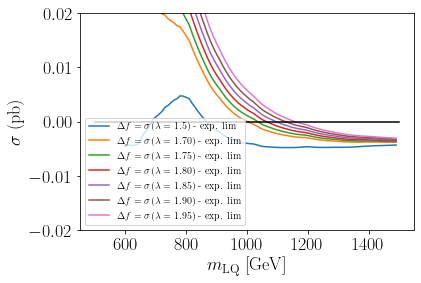

In [25]:
fig, ax = plt.subplots(1,1)

#ax.plot(mlq_interpolated, xsec_U1_LO_g4_nom(mlq_interpolated), label = r'$\sigma_{\rm LO}$, $\lambda = 1$, interpolated')
ax.plot(mlq_interpolated, delta_xsec_U1_minus1sigma(1.5, mlq_interpolated), label = r'$\Delta f = \sigma (\lambda = 1.5)$ - exp. lim')

for coupling in [1.7 + 0.05*i for i in range(6)]:
    ax.plot(mlq_interpolated, delta_xsec_U1_minus1sigma(coupling, mlq_interpolated), label = r'$\Delta f = \sigma (\lambda = {:.2f})$ - exp. lim'.format(coupling))


ax.plot([500, 1500], [0, 0], color = 'black')
ax.plot()
ax.legend()
ax.set_xlabel(r'$m_{\mathrm{LQ}}$ [GeV]')
ax.set_ylabel(r'$\sigma$ (pb)')
ax.set_ylim([-0.02, 0.02])
plt.show()
plt.close()

**Cross-check with CMS:**

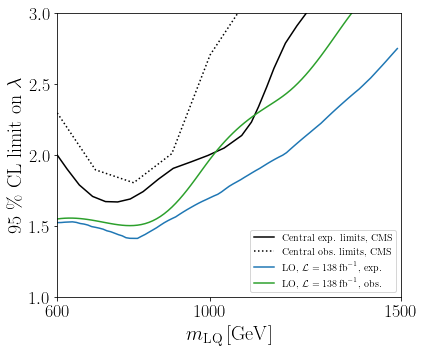

In [26]:
fig, ax = plt.subplots(1,1, figsize=(6, 5))

#The reported expected CMS results, from Fig. 3, digitized:
ax.plot(fig_3_x_solid, func_solid_line(fig_3_x_solid), color = 'k', alpha = 1, linestyle = 'solid', label = r'Central exp. limits, CMS')
#ax.plot(fig_3_x_dashed, func_dashed_line(fig_3_x_dashed),  color = 'k', alpha = 1, linestyle = 'dashed', label = r'Central exp. limits, CMS')


#The reported observed CMS results, from Fig. 3, digitized:
ax.plot(fig_3_x_observed, fig_3_y_observed,  color = 'k', alpha = 1, linestyle = 'dotted', label = r'Central obs. limits, CMS')


#The solution that we derived for the expected limits: 
ax.plot(mlq_interpolated, g4_limits_min1sigma_LO,  color = 'C0', alpha = 1, linewidth = 1.5, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$, exp.') #our bounds for betaL = betaR = 1

#The solution that we derived for observed limits:
ax.plot(mlq_interpolated, g4_limits_observed,  color = 'C2', alpha = 1, linewidth = 1.5, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$, obs.') #our bounds for betaL = betaR = 1



ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" 95 \% CL limit on $\lambda$", fontsize = 20)

#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xlim(600, 1500) 
ax.set_xticks([600, 1000, 1500])
ax.set_ylim(1., 3)
ax.legend()
fig.tight_layout()
#fig.savefig("cms_lq_recast_btau.pdf")
plt.show()
plt.close()


Something is very odd. 

First of all, there is a problem in the CMS paper. Clearly, for m = 600 GeV, the observed and excluded bound should be the same, but they're not. 


This scaling with $g^2$ is the problem. If we take $\lambda = 1$ and then $\lambda = 3$, the x-sec doesn't precisely scale by a factor of 9. This is almost true, but the second digit can play an important role here to fix our curves I believe.

What about this?:

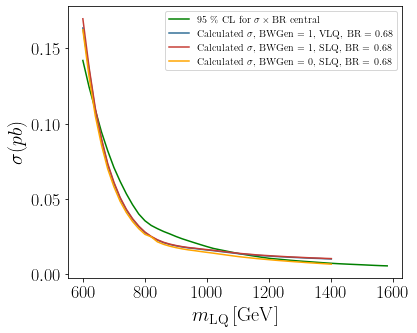

In [27]:
mlq_masses_v2 = [600 + i*20 for i in range(41)]

xsec_fig3_vlq_bwgen1 = np.array([0.24059187, 0.19974091, 0.16036351, 0.1308657, 0.1067529, 0.088699168, 0.073967162,
0.06253931, 0.053472861, 0.046259209, 0.040506135, 0.0363, 0.033043452, 0.030561057, 0.028799258, 0.027442264, 0.026338255,
0.025449185, 0.024821703, 0.024058277, 0.023394173, 0.022751065, 0.022001007, 0.021288763, 0.020556161, 0.019859122,
0.019292663, 0.018797011, 0.018232907, 0.017843174, 0.017469525, 0.017056795, 0.016742683, 0.016407135, 0.01612162, 0.015847833, 0.015548416,
0.015298636, 0.015095706, 0.014831464, 0.014610268])*0.68

xsec_fig3_slq_bwgen1 = np.array([0.24957034692761607, 0.2021347535883039, 0.16226830970066947, 0.13240859679480677, 0.10799992746916685,
0.08972815566088206, 0.07481798229635399, 0.06325334849476956, 0.05407983911719761, 0.04678226477403484, 0.040963297299171295,
0.0367048993541, 0.03342220711437067, 0.030918804926046446, 0.02914549855533675, 0.02778234180181149, 0.026675733165009447, 0.02578893189327488,
0.02517090712455285, 0.024413088111186528, 0.023752678386932617, 0.023112353262241883, 0.02236480776136315, 0.021650961228297468,
0.0209119622351984, 0.020210096426185802, 0.019648646540479944, 0.019162009367201045, 0.018598398087324886, 0.018200962984632408,
0.01781883142940543, 0.017408783099517492, 0.017100008787883564, 0.01676286243429861, 0.0164791436304218, 0.016207056850150506,
0.015909682275197214, 0.015661209425237355, 0.015458161817954995, 0.015196268195723625, 0.014979094328025449])*0.68
#is it 0.68 for the scalar leptoquark?

xsec_fig3_slq_bwgen0 = np.array([0.23870653304018338, 0.19292524380143736, 0.15467204963039477, 0.12605158411935738, 0.1027315037575506,
0.08526398322533514, 0.0710369049129549, 0.05999507325478874, 0.05123270742441694, 0.04425561303516538, 0.03868323646389545,  0.0363,
0.031378857598332234, 0.028912194731446652, 0.027115494216060174, 0.025693583821164125, 0.024504270529678622, 0.023509892945259986,
0.022745258566001465, 0.021864598024589413, 0.021067098523899968, 0.020288523451021737, 0.01942977053668541, 0.01860502285932967,
0.017769839011168177, 0.016972689352484454, 0.01628806289644112, 0.015664195938462352, 0.014993557415655136, 0.014445389235633418,
0.01391301394766761, 0.013368855928829682, 0.012896097590735381, 0.012411558651912307, 0.011965914541870145, 0.01153320853684141,
0.011092979487826003, 0.010687347600323794, 0.010312689533799766, 0.009914250409523064, 0.009546476400788298])*0.68

fig, ax = plt.subplots(1,1, figsize=(6, 5))

#The reported expected CMS results, from Fig. 3, digitized:
#ax.plot(fig_3_x_solid, func_solid_line(fig_3_x_solid),     color = 'k', alpha = 1, linestyle = 'solid', label = r'$-1 \sigma$ exp. limits, CMS')
#ax.plot(fig_3_x_dashed, func_dashed_line(fig_3_x_dashed),  color = 'k', alpha = 1, linestyle = 'dashed', label = r'Central exp. limits, CMS')

#Our result
ax.plot(mlq_masses, funkCentral(mlq_masses), color = 'green', label = r'95 \% CL for $ \sigma \times \mathrm{BR}$ central')
ax.plot(mlq_masses_v2, xsec_fig3_vlq_bwgen1, color = niceBlueColorForLine[0], alpha = 1, linestyle = 'solid', label = r'Calculated $\sigma$, BWGen = 1, VLQ, BR = 0.68')
ax.plot(mlq_masses_v2, xsec_fig3_slq_bwgen1, color = flavioLine[0], alpha = 1, linestyle = 'solid', label = r'Calculated $\sigma$, BWGen = 1, SLQ, BR = 0.68')
ax.plot(mlq_masses_v2, xsec_fig3_slq_bwgen0, color = 'orange', alpha = 1, linestyle = 'solid', label = r'Calculated $\sigma$, BWGen = 0, SLQ, BR = 0.68')

#ax.plot(mlq_masses, funkObserved(mlq_masses), color = 'gray', label = r'95 \% CL for $ \sigma \times \mathrm{BR}$ observed')



ax.legend()
ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $\sigma (pb)$", fontsize = 20)

plt.show()

plt.close()

These two lines should lie on each other.
Ugh, still doesn't look good. It seems now that for lower masses I will still have this pretty large difference in the bounds, right?

So what could be the problem? Did I do well the digitizing? What's the thing for lower masses?

Or maybe I should use the scalar LQ thing. But the x-sec should be the same...but maybe the correction to the finite width not??

It is...hmm....this is all superweird...For higher masses even BWGen = 0 is better than BWGen = 1.

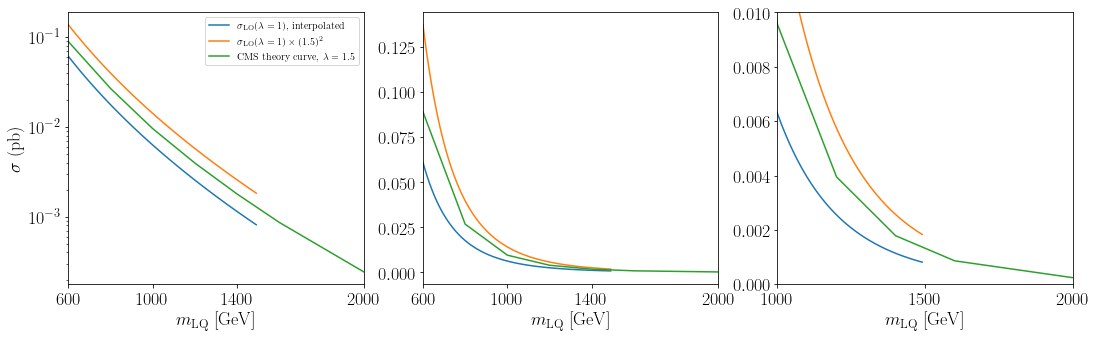

In [28]:
fig, ax = plt.subplots(1,3, figsize=(18,5))


ax[0].set_yscale('log')
ax[0].set_xlim(600, 2000)
ax[0].set_xticks([600, 1000, 1400, 2000])
ax[1].set_xticks([600, 1000, 1400, 2000])
ax[2].set_xticks([1000, 1500, 2000])


ax[1].set_xlim(600, 2000)
ax[2].set_xlim(1000, 2000)
ax[2].set_ylim(0, 0.01)

ax[0].set_ylabel(r'$\sigma$ (pb)')

for i in range(3):
    ax[i].plot(mlq_interpolated, xsec_U1_LO_g4_nom(mlq_interpolated), label = r'$\sigma_{\rm LO} (\lambda = 1)$, interpolated')
    ax[i].plot(mlq_interpolated, ((1.5)**2)*xsec_U1_LO_g4_nom(mlq_interpolated), label = r'$\sigma_{\rm LO} (\lambda = 1) \times (1.5)^2$')
    ax[i].plot(obs_limits_x[:7], theory_scalarLQ_CMS_y, label = r'CMS theory curve, $\lambda = 1.5$')
    
    ax[i].set_xlabel(r'$m_{\mathrm{LQ}}$ [GeV]')
    ax[0].legend()
plt.show()
plt.close()

The theory curves (orange and green) are in good agreement, as it should be, for the BR = 0.68. Still, the bounds are not in a good agreement. 

There is either an error with CMS or something not reported in the way they take out these bounds. But it should be as simple as we did it..

# Light-quark scenario, Fig. 2: - DEPRECATED

Digitize again the plot (Fig 2 right of the CMS paper http://cds.cern.ch/record/2859388/files/EXO-22-018-pas.pdf):

In [29]:
limits_x_light = np.array([596.6569767, 651.1627907, 696.9476744,760.1744186,829.9418605,899.7093023,952.0348837,
1004.360465,1061.046512, 1156.976744, 1202.761628,1292.151163,1418.604651,1501.453488,1571.22093,1649.709302,1736.918605,
1841.569767,1954.94186,2072.674419,2242.732558,2382.267442,2543.604651,2648.255814,2737.645349,2861.918605,2944.767442,2997.093023])

The expected bounds (central value) curve:

In [30]:
expected_central_limits_y_light = np.array([0.288554115, 0.213572561, 0.158075162, 0.108166035, 0.068426964, 0.045020373,0.037485528,
0.031622777, 0.025987992, 0.019234943, 0.016440275, 0.013161888, 0.009741736, 0.00800588, 0.007116603, 0.006326105,
0.005336699, 0.004561324, 0.003797917, 0.003121175, 0.002531682, 0.002107966, 0.001755166, 0.001560206, 0.001442417, 0.001265531,
0.001201007, 0.001154782])

The expected $+ 1 \sigma$ curve:

In [31]:
expected_plusonesigma_limits_y_light = np.array([0.379791687, 0.300104652,0.219234597,0.14614122,0.092450463,0.066659743,0.052673346,0.04385766,
0.036517413,0.027384196,0.023405514,0.018254235,0.013510823,0.011103363,0.010131688,0.008773681,0.007597694,0.006409412,0.005336699,0.004443521,
0.00355743,0.00292354,0.002498776,0.002250467,0.002053525,0.001849462,0.001755166,0.001687612])

The expected $+2\sigma$ curve:

In [32]:
expected_plustwosigma_limits_y_light = np.array([0.547818083, 0.400195985, 0.300104652, 0.20004899,0.12990814, 0.082181247, 0.069328067,
0.058485129, 0.048696753, 0.0355743, 0.030405668, 0.024662975, 0.018254235, 0.015001558, 0.013335214, 0.011699891, 0.010265111, 0.008547088,
0.007116603, 0.005925531, 0.004806381, 0.00400196, 0.003465554, 0.003040567, 0.002811018, 0.002531682, 0.002371374, 0.00231013])

The expected $-1 \sigma$ curve:

In [33]:
expected_minusonesigma_limits_y_light = np.array([0.210796617, 0.151991108, 0.112495814, 0.075976943, 0.049338032,
0.031622777, 0.027028266, 0.022801034, 0.018984934, 0.013688745, 0.011853965, 0.009366793, 0.006932807, 0.005697467,
0.005064604, 0.004443521, 0.003847931, 0.003246113, 0.002702827, 0.002250467, 0.001778279, 0.001480657, 0.001249082,
0.001110336, 0.001, 0.000924505, 0.0008436, 0.000800588])

The expected $-2 \sigma$ curve:

In [34]:
expected_minustwosigma_limits_y_light = np.array([0.153992653,0.113977252,0.086596432,0.058485129,0.037979169,0.024342414,0.02026834,
0.017323529,0.014051648,0.010265111,0.009124882,0.007401473,0.005267335,0.004272498,0.003898604,0.003376052,0.00292354,0.002466297,
0.002026834,0.001687612,0.001351082,0.001124958,0.000936679,0.000832635,0.000769775,0.000675376,0.000616272,0.000600356])

Interpolate the functions:

In [35]:
funkPlusTwoSigmaLight =  interpolejsn.interp1d(limits_x_light, expected_plustwosigma_limits_y_light, kind = "linear")
funkPlusOneSigmaLight =  interpolejsn.interp1d(limits_x_light, expected_plusonesigma_limits_y_light, kind = "linear")
funkCentralLight =       interpolejsn.interp1d(limits_x_light, expected_central_limits_y_light, kind = "linear")
funkMinusOneSigmaLight = interpolejsn.interp1d(limits_x_light, expected_minusonesigma_limits_y_light, kind = "linear")
funkMinusTwoSigmaLight = interpolejsn.interp1d(limits_x_light, expected_minustwosigma_limits_y_light, kind = "linear")

Check:

In [36]:
len(expected_central_limits_y_light) == len(expected_plusonesigma_limits_y_light) == len(expected_plustwosigma_limits_y_light) ==  len(expected_minusonesigma_limits_y_light) == len(expected_minustwosigma_limits_y_light) == len(limits_x_light)

True

The observed limits:

In [37]:
obs_limits_x_light = np.array([600 + i*300 for i in range(9)])
obs_limit_y_light = np.array([0.3376, 0.06326, 0.01424, 0.0060826, 0.0038986, 0.004108, 0.002532, 0.002340, 0.001802])

Re-plot the CMS picture:

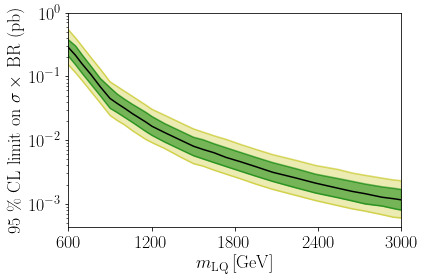

In [38]:
fig, ax = plt.subplots(1,1)
ax.plot(limits_x_light, funkCentralLight(limits_x_light),        color = 'k', alpha = 1)
ax.plot(limits_x_light, funkMinusTwoSigmaLight(limits_x_light),  color = 'y', alpha=0.5)
ax.plot(limits_x_light, funkMinusOneSigmaLight(limits_x_light),  color = 'g', alpha=0.5)
ax.plot(limits_x_light, funkPlusOneSigmaLight(limits_x_light),   color = 'g', alpha=0.5)
ax.plot(limits_x_light, funkPlusTwoSigmaLight(limits_x_light),   color = 'y', alpha=0.5)

ax.fill_between(limits_x_light, funkMinusTwoSigmaLight(limits_x_light), funkPlusTwoSigmaLight(limits_x_light), alpha=0.3, color='y')
ax.fill_between(limits_x_light, funkMinusOneSigmaLight(limits_x_light), funkPlusOneSigmaLight(limits_x_light), alpha=0.5, color='g')

ax.set_yscale('log')

#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 18)
ax.set_ylabel(r" 95 \% CL limit on $ \sigma \times \, \mathrm{BR} $ (pb)", fontsize = 18)
#ax.set_title(r"CMS Recast - Light quarks")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600 + i*600 for i in range(5)])
ax.set_yticks([1e-3, 1e-2, 1e-1, 1])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(600, 3000) 

fig.tight_layout()
#fig.savefig("cms_lq_recast_qtau.pdf")
plt.show()
plt.close()


# Limits on $g_4, m_U$; $b \tau$ only:

The strategy is the following:
1) Take the data out of HEPdata of the exclusion bounds for the different values of the coupling. 
2) For different values of the coupling $g_4$ we should calculate the x-sec for different masses.
3) After this, we inject our $U_1$ x-section in the plots given by the CMS collaboration. 
4) From there on, we simply check where do they cross. They should cross in a similar point where the scalarLQ is cutting the curve.
5) Repeat then for the other couplings. 

**First step:**

Exclusion bounds for $\lambda = 1, 1.5, 2, 3$: 

In [39]:
lambda_couplings_bounds =  [0.25, 0.5, 1, 1.5, 2, 3] #the values reported by CMS are 1, 1.5, 2, 3, but the bounds for lower lambda should be the same as for \lambda = 1, as all of them are NWA.
lambda_couplings_ext = [0.25, 0.5, 1, 1.5, 2, 3] + [3.5] #the 3.5 is added. We will "extrapolate" the bounds to these values.
#Due to the fact that we have this nice enhancement, there is no need really to "extrapolate", but whatever. 

exp_bounds_mlq = [600, 800, 1000, 1200, 1400, 1600, 2000] + [2200, 2400, 2600]
#The extrapolated points are in the second array. We will also add 2200, 2400, 2600. Extrapolate then the bounds in the direction of the mass. This is trivial actually.


exp_bounds_lambda1 = [0.13602, 0.023747, 0.01295, 0.0074018, 0.0048956, 0.0034631, 0.0021976]

exp_bounds_lambda15 = [0.14411, 0.034594, 0.018011, 0.010385, 0.0070947, 0.0051946, 0.0034873]

exp_bounds_lambda2 = [0.16311, 0.035187, 0.01904, 0.012491, 0.0087524, 0.0064319, 0.0044328]

exp_bounds_lambda3 = [0.19802, 0.04075, 0.026894, 0.016477, 0.011862, 0.0092991, 0.0066474]

exp_bounds_matrix = np.array([[0.13602, 0.023747, 0.01295, 0.0074018, 0.0048956, 0.0034631, 0.0021976] + [0.0021976]*3, #lambda = 0.25
                              [0.13602, 0.023747, 0.01295, 0.0074018, 0.0048956, 0.0034631, 0.0021976] + [0.0021976]*3, #lambda = 0.5
                              [0.13602, 0.023747, 0.01295, 0.0074018, 0.0048956, 0.0034631, 0.0021976] + [0.0021976]*3, #lambda = 1
                              [0.14411, 0.034594, 0.018011, 0.010385, 0.0070947, 0.0051946, 0.0034873] + [0.0034873]*3, #lambda = 1.5
                              [0.16311, 0.035187, 0.01904, 0.012491, 0.0087524, 0.0064319, 0.0044328] + [0.0044328]*3, #lambda = 2
                              [0.19802,  0.04075, 0.026894, 0.016477, 0.011862, 0.0092991, 0.0066474] + [0.0066474]*3 #lambda = 3
                              ]) 

#in case we need it for interpolation purposes. Row is \lambda, column is mass mLQ. For the masses, we can extrapolate, for the couplings, we use scipy to extrapolate

#NOTE: You might want to use the observed limits! Check how the limits look like if you use the observed limits. 
#Here we save the observed limits. Call them again exp_bounds_matrix so I don't have to change anything in the code
                                                #OBSERVED LIMITS:
obs_bounds_matrix = np.array([
    [0.21635, 0.038119, 0.022076, 0.013028, 0.0098673, 0.0037468, 0.001777] + [0.001777]*3,     #lambda  = 0.25
    [0.21635, 0.038119, 0.022076, 0.013028, 0.0098673, 0.0037468, 0.001777] + [0.001777]*3,     #lambda = 0.5
    [0.21635, 0.038119, 0.022076, 0.013028, 0.0098673, 0.0037468, 0.001777] + [0.001777]*3,     #lambda = 1
    [0.14794, 0.040144, 0.024652, 0.015161, 0.010951, 0.0051042, 0.0030128] + [0.0030128]*3,    #lambda  = 1.5
    [0.20232, 0.038533, 0.030413, 0.017262, 0.012383, 0.0060978, 0.0038903] + [0.0038903]*3,    #lambda = 2
    [0.20529, 0.048501, 0.038986, 0.024436, 0.018185, 0.0096329, 0.0059648] + [0.0059648]*3     #lambda = 3

])

#Actually, let's transpose this matrix, so every matrix is of the form: row mLQ, column \lambda (g_4)

exp_bounds_matrix = exp_bounds_matrix.transpose()
obs_bounds_matrix = obs_bounds_matrix.transpose()


#CONCERNING EXTRAPOLATION:

#What we will do is assume that the bounds for mU > 2 TeV are the same as for 5 TeV. This is a reasonable assumption (disccused with Admir).
#What to do for larger couplings? 
#For now, we can just do extrapolation. In the sense, the bounds move kinda linearly upwards (although this is not completely clear - discuss this point, why are they moving linearly?).
#And then, let's see. 
#So the first 7 points on the mass axis: 600, 800, 1000, 1200, 1400, 1600, 2000 ARE GENUINE. For the rest, we extrapolate. 
#Also, for g4 = lambda = 1, 1.5, 2 and 3 we have genuine data. For larger couplings, we don't have. We extrapolate WITH THE HELP OF SCIPY (for now). 

### For the single LQ production - bounds:

We need to do the same as for the resonant production:

In [40]:
mass_lq_single_prod = [600.,  650.,  700.,  750.,  800.,  850.,  900.,  950., 1000.,
       1050., 1100., 1150., 1200., 1250., 1300., 1350., 1400., 1450.,
       1500., 1550., 1600., 1650., 1700., 1750., 1800., 1850., 1900.,
       1950., 2000., 2050., 2100., 2150., 2200., 2250.]

couplings_lq_single_prod = [1.5, 2.5]


#For gbl = 1 (check Admir's and Ilja's model) we have the following x-sec:

x_sec_single_prod_13TeV = [
0.1699, 0.1079, 0.07083, 0.04714, 0.03194, 0.02209, 0.01551, 0.01103, 0.007916, 
0.005781, 0.004228, 0.003142, 0.002342, 0.001768, 0.00134, 0.001024, 0.0007862, 
0.0006065, 0.00047, 0.0003663, 0.000287, 0.0002263, 0.0001787, 0.0001415, 0.0001126, 
8.969e-05,  7.203e-05, 5.79e-05, 4.668e-05, 3.736e-05, 3.041e-05,  2.467e-05, 1.999e-05, 1.635e-05]

x_sec_single_prod_14TeV = [
0.2177, 0.1395, 0.09222, 0.06187, 0.04223, 0.02943, 0.02077, 0.01491,
0.01078, 0.007917, 0.005832, 0.004369, 0.003285, 0.002497, 0.001905, 
0.001467, 0.001134, 0.0008821, 0.0006888, 0.0005402, 0.0004263, 
0.0003386, 0.0002693, 0.0002149, 0.0001723, 0.0001383, 0.0001119, 
9.054e-05, 7.345e-05, 5.943e-05, 4.87e-05, 3.985e-05, 
3.259e-05, 2.688e-05]

#Exclusion bounds
mass_lq_single_prod_bounds = np.array([600 + i*50 for i in range(34)])

sigma_obs_lambda15_singleprod = [
0.0801, 0.0661, 0.053, 0.0431, 0.0346, 0.0298, 0.0265, 0.0235, 0.0209, 0.0191, 0.017, 0.016,
0.0158, 0.0147, 0.0143, 0.0134, 0.013, 0.0127, 0.0125, 0.0123, 0.0123, 0.0116, 0.0116, 0.0116,
0.0118, 0.0118, 0.0119, 0.0119, 0.0121, 0.0123, 0.0127, 0.0134, 0.0138, 0.0143]

sigma_obs_lambda25_singleprod = [0.0971, 0.0825, 0.0691, 0.0578, 0.0491, 0.047,
0.0443, 0.0424, 0.0405, 0.0376, 0.0365, 0.0376, 0.0388, 0.0405, 0.0417, 0.0424, 0.0463,
0.0477, 0.0506, 0.0537, 0.0553, 0.0587, 0.0623, 0.068, 0.0701, 0.0766, 0.0825, 0.0862, 0.0942,
0.1, 0.1126, 0.1194, 0.1305, 0.1406]

sigma_exp_lambda15_singleprod = [0.0778, 0.0588, 0.0457, 0.0351, 0.0277, 0.0232, 0.0197, 0.0178,
0.0156, 0.0134, 0.0118, 0.0111, 0.0105, 0.0099, 0.0092, 0.0088, 0.0084, 0.008, 0.0078, 0.0076, 0.0073,
0.0071, 0.0069, 0.007, 0.007, 0.007, 0.007, 0.007, 0.0071, 0.0072, 0.0076, 0.008, 0.0083, 0.0085]

sigma_exp_lambda25_singleprod = [
0.0888, 0.0722, 0.0587, 0.047, 0.0376, 0.0355, 0.0334, 0.0306, 0.0293, 0.0272, 0.026, 0.0256, 0.0264, 0.0272,
0.0276, 0.028, 0.0288, 0.0301, 0.0315, 0.0334, 0.0344, 0.0365, 0.0376, 0.0399, 0.043, 0.0456, 0.0484, 0.0521,
0.0553, 0.0604, 0.0651, 0.0701, 0.0755, 0.0825]

obs_bounds_matrix_singleprod = np.array([
    sigma_obs_lambda15_singleprod, sigma_obs_lambda25_singleprod  
])

exp_bounds_matrix_singleprod = np.array([
    sigma_exp_lambda15_singleprod,   sigma_exp_lambda25_singleprod   
])

obs_bounds_matrix_singleprod = obs_bounds_matrix_singleprod.transpose()
exp_bounds_matrix_singleprod = exp_bounds_matrix_singleprod.transpose()


In order to extrapolate for a given mass...What we can do..Fix the mass, and then interpolate as a 1D function. 

In [41]:
exp_bounds_matrix

array([[0.13602  , 0.13602  , 0.13602  , 0.14411  , 0.16311  , 0.19802  ],
       [0.023747 , 0.023747 , 0.023747 , 0.034594 , 0.035187 , 0.04075  ],
       [0.01295  , 0.01295  , 0.01295  , 0.018011 , 0.01904  , 0.026894 ],
       [0.0074018, 0.0074018, 0.0074018, 0.010385 , 0.012491 , 0.016477 ],
       [0.0048956, 0.0048956, 0.0048956, 0.0070947, 0.0087524, 0.011862 ],
       [0.0034631, 0.0034631, 0.0034631, 0.0051946, 0.0064319, 0.0092991],
       [0.0021976, 0.0021976, 0.0021976, 0.0034873, 0.0044328, 0.0066474],
       [0.0021976, 0.0021976, 0.0021976, 0.0034873, 0.0044328, 0.0066474],
       [0.0021976, 0.0021976, 0.0021976, 0.0034873, 0.0044328, 0.0066474],
       [0.0021976, 0.0021976, 0.0021976, 0.0034873, 0.0044328, 0.0066474]])

Get the x-secs from POWHEG. \
Note: We do not set any width in POWHEG, which means BR = 1, so $\sigma = \sigma_{\rm prod} \times \mathrm{BR} = \sigma_{\rm prod}$.
The width that one sets in POWHEG is the **full** width.

This is why we are able to re-scale the x-sec for different couplings by multiplying with the coupling squared. 
In our case BR will be ~0.67 (we have $\beta_L = \beta_R = 1$). We will hence multiply the x-sec that we get from POWHEG with 0.5.

Note that, since we include finite width effects, we cannot simply scale the cross-section by the coupling squared!


In [42]:
#If we set \betaR = 0, then BR = 0.5. 

bran_ratio_beta10 = 0.5

bran_ratio_beta11 = 0.68 #From Uli's paper - if \betaL^33 = \betaR^33 = 1, rest 0

slq_vlq_enhancement = 1.5 #Due to the narrower resonance of the U1 leptoquark, we can, for a larger g4, use the exclusion bounds of the scalar LQ, for a smaller lambda.
                          #This however holds only for \beta_L < 1 and/or \beta_R < 1. 

#These x-secs are calculated in the default settings of POWHEG for U1, which means \beta_L^33 = \beta_R^33 = 1.

#For now, let us only insert g4 = 1, 1.5, 2, 3. Later on, we can add a couple of other coupling values. 

#EDIT: We added also the couplings 3.5 and 4 to the cross-section. Note that we will also extend our matrices until the mass of 2500 GeV!
#Or even 2600? Take 2200, 2400, 2600. 

#We will also add lower couplings, 0.25 and 0.5. This is since for HL we have bounds that hit there. 
#For the exclusion limits, we just take the same as for \lambda = 1. This should hold, as this is definitely NWA.
#When the x-sec calc is done, set it here:

#Rows: different masses; columns - different couplings:

lambda_couplings_ext = [0.25, 0.5, 1, 1.5, 2, 3] + [3.5]

#Btw, for BWGen = 0, you can just calculate for g4 = 1 and re-scale the x-sec by g4_new^2.
xsec_U1_LO_beta11_13TeV_bwgen0 = np.array([
       ])*bran_ratio_beta11 

 #NEW!
xsec_U1_NLO_beta11_13TeV_bwgen1 = np.array([
    [7.7417906e-03, 3.0998740e-02, 1.2453354e-01, 2.8197938e-01, 5.0440754e-01, 1.1392934e+00, 1.5398472], 
    [2.1188843e-03, 8.4990027e-03, 3.4392132e-02, 7.8800457e-02, 1.4303922e-01, 3.3523913e-01, 0.46250976],
    [7.1948786e-04, 2.8918680e-03, 1.1801251e-02, 2.7386121e-02, 5.0551364e-02, 1.2308137e-01, 0.17303423],
    [2.8091081e-04, 1.1318831e-03, 4.6655631e-03, 1.0986258e-02, 2.0654918e-02, 5.2353169e-02, 0.07512415],
    [1.2087319e-04, 4.8867313e-04, 2.0379513e-03, 4.8842216e-03, 9.3667839e-03, 2.4769792e-02, 0.03627183],
    [5.5891830e-05, 2.2691327e-04, 9.5981531e-04, 2.3464298e-03, 4.6077067e-03, 1.2760180e-02, 0.01908255],
    [1.3939220e-05, 5.7256132e-05, 2.5158208e-04, 6.4669017e-04, 1.3419937e-03, 4.1392278e-03, 0.00647096],
    [7.3659696e-06, 3.0507212e-05, 1.3739309e-04, 3.6496737e-04, 7.8290935e-04, 2.5455966e-03, 0.00405774],
    [4.0036281e-06, 1.6749813e-05, 7.7852327e-05, 2.1462789e-04, 4.7807190e-04, 1.6323029e-03, 0.00264861],
    [2.2270308e-06, 9.4384833e-06, 4.5462801e-05, 1.3139993e-04, 3.0463023e-04, 1.0921716e-03, 0.00180145]])*bran_ratio_beta11

 #NEW!
xsec_U1_LO_beta11_13TeV_bwgen1 = np.array([
    [7.5719371e-03, 3.0328426e-02, 1.2197340e-01, 2.7689535e-01, 4.9742630e-01, 1.1346737e+00, 1.542631 ],
    [2.1698502e-03, 8.7071729e-03, 3.5289258e-02, 8.1161389e-02, 1.4820808e-01, 3.5260616e-01, 0.49008761 ],
    [7.6192882e-04, 3.0637022e-03, 1.2526827e-02, 2.9220358e-02, 5.4350785e-02, 1.3498140e-01, 0.19184408],
    [3.0533204e-04, 1.2306222e-03, 5.0875663e-03, 1.2061373e-02, 2.2917500e-02, 5.9581312e-02, 0.0865837 ],
    [1.3427414e-04, 5.4277021e-04, 2.2722835e-03, 5.4982626e-03, 1.0699460e-02, 2.9222512e-02, 0.04341056],
    [6.3264496e-05, 2.5665106e-04, 1.0917039e-03, 2.7054379e-03, 5.4137121e-03, 1.5557293e-02, 0.02364501],
    [1.6292486e-05, 6.6830790e-05, 2.9699858e-04, 7.8380016e-04, 1.6706105e-03, 5.3528290e-03, 0.0084855 ],
    [8.7375601e-06, 3.6117548e-05, 1.6519116e-04, 4.5270697e-04, 9.9979754e-04, 3.4000126e-03, 0.00549883],
    [4.8201460e-06, 2.0109586e-05, 9.5220883e-05, 2.7237107e-04, 6.2705578e-04, 2.2502385e-03, 0.00370298],
    [2.7232033e-06, 1.1490627e-05, 5.6813863e-05, 1.6984141e-04, 4.0923827e-04, 1.5443883e-03, 0.00258304]])*bran_ratio_beta11

xsec_U1_NLO_beta11_13TeV_bwgen0 = np.array([ 
    ])*bran_ratio_beta11

#NEW!
xsec_U1_LO_beta11_14TeV_bwgen1 = np.array([
    [9.0722698e-03, 3.6331710e-02, 1.4601511e-01, 3.3111517e-01, 5.9389558e-01, 1.3502612e+00, 1.83252],
    [2.6617964e-03, 1.0677916e-02, 4.3219526e-02, 9.9179436e-02, 1.8066166e-01, 4.2704014e-01, 0.59181222],
    [9.5579088e-04, 3.8412651e-03, 1.5670572e-02, 3.6432508e-02, 6.7467209e-02, 1.6595545e-01, 0.23472883],
    [3.9139030e-04, 1.5762531e-03, 6.4931589e-03, 1.5314489e-02, 2.8911397e-02, 7.4136923e-02, 0.10706954],
    [1.7580786e-04, 7.0981868e-04, 2.9569958e-03, 7.0968693e-03, 1.3686874e-02, 3.6729339e-02, 0.05413337],
    [8.4588812e-05, 3.4256948e-04, 1.4462859e-03, 3.5447401e-03, 7.0052655e-03, 1.9696906e-02, 0.02963015],
    [2.2712567e-05, 9.2793763e-05, 4.0661021e-04, 1.0514596e-03, 2.1979924e-03, 6.8183491e-03, 0.01069635],
    [1.2438772e-05, 5.1155546e-05, 2.2948796e-04, 6.1316638e-04, 1.3235784e-03, 4.3318881e-03, 0.00692545],
    [7.0080246e-06, 2.9031462e-05, 1.3397421e-04, 3.7128835e-04, 8.2982829e-04, 2.8700051e-03, 0.00466776],
    [4.0437393e-06, 1.6905220e-05, 8.0657058e-05, 2.3284212e-04, 5.4122257e-04, 1.9649836e-03, 0.00324769]])*bran_ratio_beta11


xsec_U1_NLO_beta11_14TeV_bwgen1 = np.array([
    [9.3894216e-03, 3.7589757e-02, 1.5091141e-01, 3.4134795e-01, 6.0976385e-01, 1.3730359e+00, 1.8528642 ],
    [2.6307808e-03, 1.0549013e-02, 4.2631982e-02, 9.7481283e-02, 1.7653370e-01, 4.1129214e-01, 0.56571162],
    [9.1333046e-04, 3.6689948e-03, 1.4938637e-02, 3.4559095e-02, 6.3536955e-02, 1.5336984e-01, 0.21473151],
    [3.6433162e-04, 1.4667804e-03, 6.0258528e-03, 1.4123263e-02, 2.6395753e-02, 6.6062487e-02, 0.09431184],
    [1.6013366e-04, 6.4654053e-04, 2.6837892e-03, 6.3872478e-03, 1.2155170e-02, 3.1630238e-02, 0.04596935],
    [7.5623108e-05, 3.0640409e-04, 1.2876257e-03, 3.1207507e-03, 6.0598315e-03, 1.6420723e-02, 0.02434821],
    [1.9677348e-05, 8.0494585e-05, 3.4919422e-04, 8.8423440e-04, 1.7995343e-03, 5.3766229e-03, 0.00830082],
    [1.0624924e-05, 4.3757344e-05, 1.9379656e-04, 5.0372459e-04, 1.0562431e-03, 3.3208611e-03, 0.00522514],
    [5.9043573e-06, 2.4514762e-05, 1.1132675e-04, 2.9853295e-04, 6.4678335e-04, 2.1323566e-03, 0.00341156],
    [3.3594477e-06, 1.4087286e-05, 6.5886678e-05, 1.8340026e-04, 4.1167708e-04, 1.4195809e-03, 0.00230959]])*bran_ratio_beta11

#For \beta_L^33 = 1 and \beta_R^33 = 0, rescale with a factor of 1/2

#xsec_U1_LO_nominal_beta10_array, xsec_U1_NLO_nominal_beta10_array = 0.5*xsec_U1_LO_nominal_beta11_array, 0.5*xsec_U1_NLO_nominal_beta11_array 

We could also plot the LO and the NLO x-sec for a particular value of the coupling:

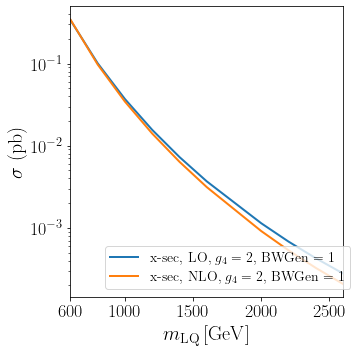

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(exp_bounds_mlq, xsec_U1_LO_beta11_13TeV_bwgen1[:, 4],   color = 'C0', alpha = 1, linewidth = 2, label = r'x-sec, LO, $g_4 = 2$, BWGen = 1') #our bounds for betaL = betaR = 1
ax.plot(exp_bounds_mlq, xsec_U1_NLO_beta11_13TeV_bwgen1[:, 4],   color = 'C1', alpha = 1, linewidth = 2, label = r'x-sec, NLO, $g_4 = 2$, BWGen = 1') #our bounds for betaL = betaR = 1


ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $\sigma$ (pb) ", fontsize = 20)

#Line:

#plt.plot([1000, 2000 ], [0.5, 0.8], color = 'C0')  ljubicasta
#plt.plot([1000, 2000 ], [1.1, 2.1], color = 'C1')  ljubicasta

#plt.plot([1000, 2000], [0.6, 1.1], color = 'C2')
#plt.plot([1000, 2000], [1.5, 2.8], color = 'C3')

#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
#ax.set_xticks([600 + i*400 for i in range(4)])
#ax.set_yticks([1e-3, 1e-2, 1e-1])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(1500, 2600) 
ax.set_xticks([600, 1000, 1500, 2000, 2500])
ax.set_yscale('log')
ax.legend(loc=2, bbox_to_anchor=(0.1, 0.2), fontsize = 14)



fig.tight_layout()
#fig.savefig("u1_LO_NLO_with_comparison_betaR1.pdf")
plt.show()
plt.close()


Let's take the differences:

In [44]:
for i_mlq, mlq in enumerate(exp_bounds_mlq):
    print(f' For the mass {mlq}, and the fixed coupling  the LO/NLO ratio is is {xsec_U1_LO_beta11_13TeV_bwgen1[i_mlq, 3]/xsec_U1_NLO_beta11_13TeV_bwgen1[i_mlq, 3]}')

 For the mass 600, and the fixed coupling  the LO/NLO ratio is is 0.9819702064739627
 For the mass 800, and the fixed coupling  the LO/NLO ratio is is 1.0299608922318815
 For the mass 1000, and the fixed coupling  the LO/NLO ratio is is 1.066976882195182
 For the mass 1200, and the fixed coupling  the LO/NLO ratio is is 1.0978599810781797
 For the mass 1400, and the fixed coupling  the LO/NLO ratio is is 1.1257193162570673
 For the mass 1600, and the fixed coupling  the LO/NLO ratio is is 1.1530018498742218
 For the mass 2000, and the fixed coupling  the LO/NLO ratio is is 1.2120180518593626
 For the mass 2200, and the fixed coupling  the LO/NLO ratio is is 1.2404039572085581
 For the mass 2400, and the fixed coupling  the LO/NLO ratio is is 1.2690385671685072
 For the mass 2600, and the fixed coupling  the LO/NLO ratio is is 1.2925532760938305


What we could do is do 2D interpolation grids for the cross-sections and the exclusion bounds, so we get smoother curves. Later on, we will think also about extrapolation.

N.B.: For the projected luminosity: maybe it's better if we calculate the limits, rather than just project the final limits. The thing is that the normal limits go up to g4 = 4, and projecting them brings the L = 3 ab^-1 limits only to g4 ~ 2. We cannot anyway go further than 4. So it's better to calculate the limits, rather than just rescale the final answer. 

For $g_4 < 1$ : To be conservative, keep the same bounds as for $g_4 = 1$ ie $\lambda = 1$.

Here it is all x-secs for BWGen = 1; it's what CMS also used

In [45]:
exp_bounds_matrix_interpolated = interpolejsn.RegularGridInterpolator((exp_bounds_mlq, lambda_couplings_bounds), exp_bounds_matrix)
obs_bounds_matrix_interpolated = interpolejsn.RegularGridInterpolator((exp_bounds_mlq, lambda_couplings_bounds), obs_bounds_matrix)
xsec_U1_LO_beta11_13TeV_interpolated =  interpolejsn.RegularGridInterpolator((exp_bounds_mlq, lambda_couplings_ext), xsec_U1_LO_beta11_13TeV_bwgen1)
xsec_U1_NLO_beta11_13TeV_interpolated =  interpolejsn.RegularGridInterpolator((exp_bounds_mlq, lambda_couplings_ext), xsec_U1_NLO_beta11_13TeV_bwgen1)
xsec_U1_LO_beta11_14TeV_interpolated =  interpolejsn.RegularGridInterpolator((exp_bounds_mlq, lambda_couplings_ext), xsec_U1_LO_beta11_14TeV_bwgen1)
xsec_U1_NLO_beta11_14TeV_interpolated =  interpolejsn.RegularGridInterpolator((exp_bounds_mlq, lambda_couplings_ext), xsec_U1_NLO_beta11_14TeV_bwgen1)

Do the same for the bounds on single LQ production:

In [46]:
exp_bounds_matrix_interpolated_singleprod = interpolejsn.RegularGridInterpolator((mass_lq_single_prod, couplings_lq_single_prod), exp_bounds_matrix_singleprod)
obs_bounds_matrix_interpolated_singleprod = interpolejsn.RegularGridInterpolator((mass_lq_single_prod, couplings_lq_single_prod), obs_bounds_matrix_singleprod)


Now you can find the value of the bound for any value of the mass $m_{\rm LQ}$ and the coupling $g_4$; we have to give it as an array [$m_{\rm LQ}$, $g_4$].

In [47]:
exp_bounds_matrix_interpolated([850, 3]), obs_bounds_matrix_interpolated([850,3])

(array([0.037286]), array([0.04612225]))

Define the curves $\Delta f(g_4, m_{\mathrm{LQ}}) = \sigma_{\mathrm{U1}}(g_4, m_{\mathrm{LQ}}) - \mathrm{exp}_{\mathrm{95 \% CL}}(g_4, m_{\mathrm{LQ}})$ (for every coupling or every mass, as the solutions are unique for masses larger than 1 TeV) and look for a solution of the equations $\Delta f(g_4, m_{\mathrm{LQ}}) = 0$.

EDIT: For now, we do the present limits as **observed**, and future limits as **expected**. We can swap them all in the code. 

In [48]:
#Define the array of masses for which we look for a solution:
mlq_masses = [600 + 75*i for i in range(27)]


#Here we will save the solutions:

g4_limits_beta11_LO_13TeV = np.zeros(shape = (len(mlq_masses)))
g4_limits_beta11_NLO_13TeV = np.zeros(shape = (len(mlq_masses)))
g4_limits_beta11_LO_14TeV = np.zeros(shape = (len(mlq_masses)))
g4_limits_beta11_NLO_14TeV = np.zeros(shape = (len(mlq_masses)))



for i_mlq, mlq in enumerate(mlq_masses):

    #For a fixed mass, build a 1D function of the expected (and observed) bounds as a function of the coupling:
    exp_bounds_fixed_mass = [exp_bounds_matrix_interpolated([mlq, g4])[0] for g4 in lambda_couplings_bounds] 
    obs_bounds_fixed_mass = [obs_bounds_matrix_interpolated([mlq, g4])[0] for g4 in lambda_couplings_bounds] 

    #print("This is", exp_bounds_fixed_mass)

    exp_bounds_fixed_mass_extrapolated = interpolejsn.interp1d(lambda_couplings_bounds, exp_bounds_fixed_mass, kind = 'cubic', fill_value = 'extrapolate')
    obs_bounds_fixed_mass_extrapolated = interpolejsn.interp1d(lambda_couplings_bounds, obs_bounds_fixed_mass, kind = 'cubic', fill_value = 'extrapolate')

    #print("Does it work", exp_bounds_fixed_mass_extrapolated(3.5))

    #This function is extrapolate-able. So we can use this when finding the solution to functions. 

    #Now that the mass is fixed, find for every value of the mass an intersection between our 3D grids - the x-sec and the exp. sensitivity bound:
    
#Current bounds calculation:

    def delta_xsec_U1_LO_beta11_mU_fixed_13TeV(g4):
        return xsec_U1_LO_beta11_13TeV_interpolated([mlq, g4])[0] - obs_bounds_fixed_mass_extrapolated(g4)

    def delta_xsec_U1_NLO_beta11_mU_fixed_13TeV(g4):
        return xsec_U1_NLO_beta11_13TeV_interpolated([mlq, g4])[0] - obs_bounds_fixed_mass_extrapolated(g4)

    #The factor of the luminosity ratios, np.sqrt(138/3000) is there to account for the HL-LHC projections. 

#Future bounds calculation:

    def delta_xsec_U1_LO_beta11_mU_fixed_14TeV(g4):
        return xsec_U1_LO_beta11_14TeV_interpolated([mlq, g4])[0] - np.sqrt(138./3000)*exp_bounds_fixed_mass_extrapolated(g4)

    def delta_xsec_U1_NLO_beta11_mU_fixed_14TeV(g4):
        return xsec_U1_NLO_beta11_14TeV_interpolated([mlq, g4])[0] - np.sqrt(138./3000)*exp_bounds_fixed_mass_extrapolated(g4)
        
    #Check if the function works:
    #Solve the equations:

    try:
        solusn_LO_13TeV = optimizejsn.brentq(delta_xsec_U1_LO_beta11_mU_fixed_13TeV, 0.25, 3.5)
        g4_limits_beta11_LO_13TeV[i_mlq] = solusn_LO_13TeV
    except:
        g4_limits_beta11_LO_13TeV[i_mlq] = np.nan

    
    try:
        solusn_LO_14TeV = optimizejsn.brentq(delta_xsec_U1_LO_beta11_mU_fixed_14TeV, 0.25, 3.5)
        g4_limits_beta11_LO_14TeV[i_mlq] = solusn_LO_14TeV
    except:
        g4_limits_beta11_LO_14TeV[i_mlq] = np.nan

    try:
        solusn_NLO_13TeV = optimizejsn.brentq(delta_xsec_U1_NLO_beta11_mU_fixed_13TeV, 0.25, 3.5)
        g4_limits_beta11_NLO_13TeV[i_mlq] = solusn_NLO_13TeV
    except:
        g4_limits_beta11_NLO_13TeV[i_mlq] = np.nan

    try:
        solusn_NLO_14TeV = optimizejsn.brentq(delta_xsec_U1_NLO_beta11_mU_fixed_14TeV, 0.25, 3.5)
        g4_limits_beta11_NLO_14TeV[i_mlq] = solusn_NLO_14TeV
    except:
        g4_limits_beta11_NLO_14TeV[i_mlq] = np.nan


Note that we didn't scale the cross-section as $\sigma(m, g_4) = g_4^2 \times \sigma_{\mathrm{U1}, nom}$, i.e. we were not re-scaling the nominal values. This will introduce some errors, due to finite width effects. This is why we do a 2D grid now, and abandon this scaling!

EDIT: The errors are really small. 

Expected bounds:

In [49]:
g4_limits_beta11_NLO_14TeV

array([0.52337401, 0.51303907, 0.48180569, 0.41279444, 0.44052659,
       0.49868855, 0.52672473, 0.54769332, 0.5913868 , 0.61613091,
       0.6579207 , 0.71738613, 0.76015244, 0.83569504, 0.90710326,
       0.97374378, 1.04159842, 1.14712126, 1.50233633, 1.75139894,
       1.9707162 , 2.12515971, 2.27324037, 2.45787639, 2.87584586,
              nan,        nan])

Observed bounds:

In [50]:
g4_limits_beta11_NLO_13TeV

array([1.35948004, 1.35124812, 1.32917336, 1.28718128, 1.3960538 ,
       1.6195071 , 1.86669429, 2.02143915, 2.18759582, 2.32789346,
       2.63563305, 3.31818802,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan])

Do the same for single LQ production:

In [51]:
#Define the array of masses for which we look for a solution:
mlq_masses_singleprod = [600 + 20*i for i in range(80)]


#Here we will save the solutions:

g4_limits_beta11_LO_13TeV_singleprod = np.zeros(shape = (len(mlq_masses_singleprod)))
g4_limits_beta11_LO_14TeV_singleprod = np.zeros(shape = (len(mlq_masses_singleprod)))



for i_mlq, mlq in enumerate(mlq_masses_singleprod):

    #For a fixed mass, build a 1D function of the expected (and observed) bounds as a function of the coupling:
    exp_bounds_fixed_mass_singleprod = [exp_bounds_matrix_interpolated_singleprod([mlq, g4])[0] for g4 in [1.5, 2.5]] 
    obs_bounds_fixed_mass_singleprod = [obs_bounds_matrix_interpolated_singleprod([mlq, g4])[0] for g4 in [1.5, 2.5]] 

    print("This is", obs_bounds_fixed_mass_singleprod)

    exp_bounds_fixed_mass_extrapolated_singleprod = interpolejsn.interp1d(couplings_lq_single_prod, exp_bounds_fixed_mass_singleprod, kind = 'linear', fill_value = 'extrapolate')
    obs_bounds_fixed_mass_extrapolated_singleprod = interpolejsn.interp1d(couplings_lq_single_prod, obs_bounds_fixed_mass_singleprod, kind = 'linear', fill_value = 'extrapolate')

    print("Does it work", exp_bounds_fixed_mass_extrapolated(3))

    #This function is extrapolate-able. So we can use this when finding the solution to functions. 

    #Now that the mass is fixed, find for every value of the mass an intersection between the x-sec and the exp. sensitivity bound:
    
#Current bounds calculation:

    def delta_xsec_singleprod_LO_beta11_mU_fixed_13TeV(g4):
        return (g4**2)*x_sec_single_prod_13TeV[i_mlq] - obs_bounds_fixed_mass_extrapolated_singleprod(g4)


#Future bounds calculation:

    def delta_xsec_singleprod_LO_beta11_mU_fixed_14TeV(g4):
        return (g4**2)*x_sec_single_prod_14TeV[i_mlq] - np.sqrt(138./3000)*exp_bounds_fixed_mass_extrapolated_singleprod(g4)

        
    #Solve the equations:

    try:
        solusn_LO_13TeV_singleprod = optimizejsn.brentq(delta_xsec_singleprod_LO_beta11_mU_fixed_13TeV, 0., 3.)
        g4_limits_beta11_LO_13TeV_singleprod[i_mlq] = solusn_LO_13TeV_singleprod
    except:
        g4_limits_beta11_LO_13TeV_singleprod[i_mlq] = np.nan

    
    try:
        solusn_LO_14TeV_singleprod = optimizejsn.brentq(delta_xsec_singleprod_LO_beta11_mU_fixed_14TeV, 0., 3)
        g4_limits_beta11_LO_14TeV_singleprod[i_mlq] = solusn_LO_14TeV_singleprod
    except:
        g4_limits_beta11_LO_14TeV_singleprod[i_mlq] = np.nan



This is [0.0801, 0.0971]
Does it work 0.0066474
This is [0.07450000000000001, 0.09126000000000001]
Does it work 0.0066474
This is [0.0689, 0.08542]
Does it work 0.0066474
This is [0.06348000000000001, 0.07982]
Does it work 0.0066474
This is [0.05824, 0.07446]
Does it work 0.0066474
This is [0.053, 0.0691]
Does it work 0.0066474
This is [0.04904, 0.06458]
Does it work 0.0066474
This is [0.04508, 0.06006]
Does it work 0.0066474
This is [0.041400000000000006, 0.056060000000000006]
Does it work 0.0066474
This is [0.038, 0.05258]
Does it work 0.0066474
This is [0.0346, 0.0491]
Does it work 0.0066474
This is [0.03268, 0.04826]
Does it work 0.0066474
This is [0.03076, 0.04742]
Does it work 0.0066474
This is [0.02914, 0.04646]
Does it work 0.0066474
This is [0.027819999999999998, 0.045380000000000004]
Does it work 0.0066474
This is [0.0265, 0.0443]
Does it work 0.0066474
This is [0.025299999999999996, 0.043539999999999995]
Does it work 0.0066474
This is [0.0241, 0.04278]
Does it work 0.0066474

Check the solutions:

In [52]:
exp_bounds_fixed_mass_extrapolated_singleprod(2.5)

array(0.07334)

In [53]:
g4_limits_beta11_LO_13TeV_singleprod

array([0.61912384, 0.75846726, 0.91442643, 1.09890742, 1.31511586,
       1.56392715, 1.88295763, 2.26366514, 2.74515424,        nan,
              nan,        nan,        nan,        nan,        nan,
       0.01124323, 0.1134938 , 0.21129972, 0.29521861, 0.36694208,
       0.43646293, 0.44914677, 0.46251213, 0.50298388, 0.56786968,
       0.63003084, 0.68553842, 0.73661078, 0.7718377 , 0.79338309,
       0.81391937, 0.8639475 , 0.90952998, 0.94082972,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [54]:
g4_limits_beta11_LO_14TeV_singleprod

array([0.25122656, 0.29280001, 0.33242362, 0.3780838 , 0.43288558,
       0.48689327, 0.55248088, 0.61772187, 0.6964493 , 0.79053461,
       0.89317053, 1.00332009, 1.13738165, 1.31724212, 1.57851853,
              nan,        nan, 0.10272744, 0.16968153, 0.27935176,
       0.38254543, 0.45216739, 0.52031418, 0.58209702, 0.63719174,
       0.69067636, 0.71411044, 0.73750776, 0.77087326, 0.81177301,
       0.84993905, 0.88552225, 0.91881796, 0.94936981,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

## Moneyplot no. 1

First, smoothen out the resulting curves (this in the brackets and with ~ is a way to throw out the NaN things):

In [55]:
g4_limits_beta11_LO_13TeV_smooth = interpolejsn.interp1d(mlq_masses[:len(g4_limits_beta11_LO_13TeV[~np.isnan(g4_limits_beta11_LO_13TeV)])], g4_limits_beta11_LO_13TeV[~np.isnan(g4_limits_beta11_LO_13TeV)], kind = 'cubic', fill_value = 'extrapolate')
g4_limits_beta11_NLO_13TeV_smooth = interpolejsn.interp1d(mlq_masses[:len(g4_limits_beta11_NLO_13TeV[~np.isnan(g4_limits_beta11_NLO_13TeV)])], g4_limits_beta11_NLO_13TeV[~np.isnan(g4_limits_beta11_NLO_13TeV)], kind = 'cubic',  fill_value = 'extrapolate')
g4_limits_beta11_LO_14TeV_smooth = interpolejsn.interp1d(mlq_masses[:len(g4_limits_beta11_LO_14TeV[~np.isnan(g4_limits_beta11_LO_14TeV)])], g4_limits_beta11_LO_14TeV[~np.isnan(g4_limits_beta11_LO_14TeV)], kind = 'cubic',  fill_value = 'extrapolate')
g4_limits_beta11_NLO_14TeV_smooth = interpolejsn.interp1d(mlq_masses[:len(g4_limits_beta11_NLO_14TeV[~np.isnan(g4_limits_beta11_NLO_14TeV)])], g4_limits_beta11_NLO_14TeV[~np.isnan(g4_limits_beta11_NLO_14TeV)], kind = 'cubic',  fill_value = 'extrapolate')

For the single production:

In [56]:
g4_limits_beta11_LO_13TeV_smooth_singleprod = interpolejsn.interp1d(mlq_masses[:len(g4_limits_beta11_LO_13TeV[~np.isnan(g4_limits_beta11_LO_13TeV)])], g4_limits_beta11_LO_13TeV[~np.isnan(g4_limits_beta11_LO_13TeV)], kind = 'cubic', fill_value = 'extrapolate')
g4_limits_beta11_LO_14TeV_smooth_singleprod = interpolejsn.interp1d(mlq_masses[:len(g4_limits_beta11_LO_14TeV[~np.isnan(g4_limits_beta11_LO_14TeV)])], g4_limits_beta11_LO_14TeV[~np.isnan(g4_limits_beta11_LO_14TeV)], kind = 'cubic',  fill_value = 'extrapolate')


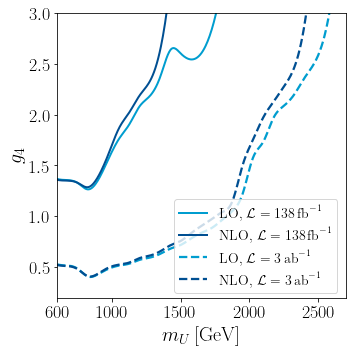

In [57]:
mlq_masses_smooth = np.arange(600, 2600, 5)

#We have the rescaling for the lumis and also for the different COM energies

fig, ax = plt.subplots(1, 1, figsize=(5, 5))


#The interpolated curves:
ax.plot(mlq_masses_smooth[0:240], g4_limits_beta11_LO_13TeV_smooth(mlq_masses_smooth)[0:240],   color = lo_color, alpha = 1, linewidth = 2, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
ax.plot(mlq_masses_smooth[0:240], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:240],  color = nlo_color, alpha = 1, linewidth = 2,  label = r'NLO, $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1

ax.plot(mlq_masses_smooth, g4_limits_beta11_LO_14TeV_smooth(mlq_masses_smooth),   color = '#009DCF', linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'LO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
ax.plot(mlq_masses_smooth, g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth),  color = '#004F92', linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'NLO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
 

#Without interpolation:
#ax.plot(mlq_masses, g4_limits_beta11_LO_13TeV,   color = lo_color, alpha = 1, linewidth = 2, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
#ax.plot(mlq_masses, g4_limits_beta11_NLO_13TeV,  color = nlo_color, alpha = 1, linewidth = 2,  label = r'NLO, $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1

#ax.plot(mlq_masses, g4_limits_beta11_LO_14TeV,   color = lo_color, linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'LO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
#ax.plot(mlq_masses, g4_limits_beta11_NLO_14TeV,  color = nlo_color, linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'NLO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
 

#ax.plot(mLQ_uli_300fb_beta10, gLQ_uli_300fb_beta10, color = 'C2', alpha = 1, label = r'Uli $\beta_R = 0$, $\mathcal{L} = 300 \mathrm{fb}^{-1}$')
#ax.plot(mLQ_uli_300fb_beta11, gLQ_uli_300fb_beta11, color = 'C3', alpha = 1, label = r'2012.11474, $\mathcal{L} = 300 \, \mathrm{fb}^{-1}$')


#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Line:

#plt.plot([1000, 2000 ], [0.5, 0.8], color = 'C0')  ljubicasta
#plt.plot([1000, 2000 ], [1.1, 2.1], color = 'C1')  ljubicasta

#plt.plot([1000, 2000], [0.6, 1.1], color = 'C2')
#plt.plot([1000, 2000], [1.5, 2.8], color = 'C3')

#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600, 1000, 1500, 2000, 2500])
#ax.set_yticks([1e-3, 1e-2, 1e-1])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(600, 2700) 
ax.set_ylim(0.2, 3)
#ax.text(x = 2000, y = 3.5, s = r'$|\beta_R| = 1$', fontsize = 18)

ax.legend(loc=2, bbox_to_anchor=(0.38, 0.37), fontsize = 14)



fig.tight_layout()
#fig.savefig("u1_LO_NLO_with_comparison_beta11.pdf")
plt.show()
plt.close()

In [58]:
np.sqrt(np.sqrt(139/3000))

0.46395235805648466

Results for $\beta_R = 0$ : 

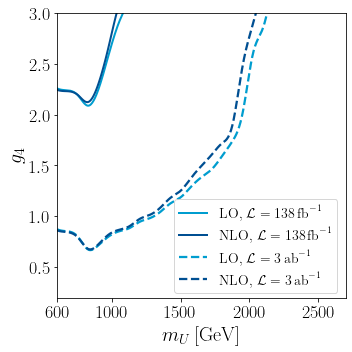

In [59]:
rescalefac = np.sqrt(2)*np.sqrt(bran_ratio_beta11)/np.sqrt(bran_ratio_beta10) #The x-sec will scale as 1/2, so the coupling as 1/np.sqrt(2) (we have a fixed width, so not g^4)
#Also, the BR is different, so re-scale our results with this! 

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.plot(mlq_masses_smooth, rescalefac*g4_limits_beta11_LO_13TeV_smooth(mlq_masses_smooth),  color = lo_color, alpha = 1, linewidth = 2, label = r'LO, $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
ax.plot(mlq_masses_smooth[0:120], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth[0:120]),  color = nlo_color, alpha = 1, linewidth = 2,  label = r'NLO, $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1

ax.plot(mlq_masses_smooth, rescalefac*g4_limits_beta11_LO_14TeV_smooth(mlq_masses_smooth),   color = lo_color, linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'LO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
ax.plot(mlq_masses_smooth, rescalefac*g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth),  color = nlo_color, linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'NLO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
 
#ax.plot(mLQ_uli_300fb_beta10, gLQ_uli_300fb_beta10, color = 'C3', alpha = 1, label = r'2012.11474, $\mathcal{L} = 300 \, \mathrm{fb}^{-1}$')


#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Line:

#plt.plot([1000, 2000 ], [0.5, 0.8], color = 'C0')  ljubicasta
#plt.plot([1000, 2000 ], [1.1, 2.1], color = 'C1')  ljubicasta

#plt.plot([1000, 2000], [0.6, 1.1], color = 'C2')
#plt.plot([1000, 2000], [1.5, 2.8], color = 'C3')

#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600, 1000, 1500, 2000, 2500])
#ax.set_yticks([1e-3, 1e-2, 1e-1])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(600, 2700) 
ax.set_ylim(0.2, 3)
#ax.text(x = 2000, y = 3.5, s = r'$|\beta_R| = 0$', fontsize = 18)

ax.legend(loc=2, bbox_to_anchor=(0.38, 0.37), fontsize = 14)



fig.tight_layout()
#fig.savefig("u1_LO_NLO_with_comparison_beta10.pdf")
plt.show()
plt.close()

Ove plotove za Appendix!

### Digitized plots - Bounds from other experiments

We used this paper for the other bounds:
https://arxiv.org/pdf/2210.13422.pdf

Here are also the bounds from Uli's paper (Fig. 6, left, in https://arxiv.org/pdf/2012.11474.pdf)

In [60]:
#These are the lines from the b + \tau signature, 300 fb^-1:

#The blue curve
mLQ_uli_300fb_beta10 = np.array([1000, 1085.399449, 1162.534435, 1242.424242, 1333.333333, 1460.055096,
1501.37741, 1625.344353, 1735.53719, 1785.123967, 1881.5427, 1939.393939, 2002.754821])
gLQ_uli_300fb_beta10 = np.array([2.100917431, 2.247706422, 2.388379205, 2.529051988, 2.804281346,
3.195718654, 3.305810398, 3.80733945, 4.235474006, 4.529051988, 5.177370031, 5.556574924, 5.996941896])

#The green curve - we will not need this
mLQ_uli_300fb_betaR05 = np.array([1000, 1253.443526, 1330.578512, 1382.92011, 1482.093664,
1608.815427, 1641.873278, 1782.369146, 1876.033058, 1939.393939, 2046.831956, 2107.438017, 2170.798898, 2000])
gLQ_uli_300fb_betaR05 = np.array([1.691131498, 2.168195719, 2.388379205, 2.529051988, 2.804281346, 3.195718654,
3.305810398, 3.80733945, 4.235474006, 4.529051988, 5.177370031, 5.556574924, 5.996941896, 4.810397554])

#The red curve
mLQ_uli_300fb_beta11 = np.array([1000, 1253.443526, 1366.391185, 1567.493113, 
                                 1749.311295, 1840.220386, 1997.245179, 2063.360882, 2391.184573])
gLQ_uli_300fb_beta11 = np.array([1.189602446, 1.556574924, 1.795107034, 2.22324159, 2.620795107,
                                 2.896024465, 3.360856269, 3.80733945, 5.996941896])

Here are bounds from $pp \to \tau \tau$, ATLAS, $139 \, \mathrm{fb}^{-1}$, with $\beta_R = 0$:

In [61]:
mLQ_ppTauTauATLAS_139_beta10 = np.array([1000, 2024.657])
gLQ_ppTauTauATLAS_139_beta10 = np.array([1.079561, 2.1714677])

#Create a line so we can extrapolate

ppTauTauATLAS_139_beta10 = interpolejsn.interp1d(mLQ_ppTauTauATLAS_139_beta10, gLQ_ppTauTauATLAS_139_beta10, kind = "linear", fill_value = "extrapolate")

Bounds from $pp \to \tau \tau$, CMS, $\beta_R = 0$:

In [62]:
mLQ_ppTauTauCMS_beta10 = np.array([1000, 2024.6575342465753])
gLQ_ppTauTauCMS_beta10 = np.array([1.4691358, 2.961591])

#Create a line for extrapolation

ppTauTauCMS_beta10 = interpolejsn.interp1d(mLQ_ppTauTauCMS_beta10, gLQ_ppTauTauCMS_beta10, kind='linear', fill_value = 'extrapolate')

Bounds from $pp \to \tau \tau$, CMS, $\beta_R = 0$, at $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$, scaled by the ATLAS scaling:

In [63]:
gLQ_ppTauTauCMS_beta10_3000 = gLQ_ppTauTauCMS_beta10*(0.84087791/1.079561)

ppTauTauCMS_beta10_3000 = interpolejsn.interp1d(mLQ_ppTauTauCMS_beta10, gLQ_ppTauTauCMS_beta10_3000, kind='linear', fill_value = 'extrapolate')

Bounds from $pp \to \tau \tau$, ATLAS, $3 \mathrm{ab}^{-1}$, with $\beta_R = 0$:

In [64]:
mLQ_ppTauTauATLAS_3000_beta10 = np.array([1000, 2024.65753])
gLQ_ppTauTauATLAS_3000_beta10 = np.array([0.8408779149519918, 1.7023319615912254 ])

ppTauTauATLAS_3000_beta10 = interpolejsn.interp1d(mLQ_ppTauTauATLAS_3000_beta10, gLQ_ppTauTauATLAS_3000_beta10, kind='linear', fill_value = 'extrapolate')

$R(D)$ data, with $\beta_R = 0$:

In [65]:
mLQ_rD_beta10_lower = np.array([1000, 3000])
gLQ_rD_beta10_lower = np.array([0.585733, 1.75041])

mLQ_rD_beta10_upper = np.array([1000, 2725.75251])
gLQ_rD_beta10_upper = np.array([1.4690117, 3.9983249])

rD_beta10_lower = interpolejsn.interp1d(mLQ_rD_beta10_lower, gLQ_rD_beta10_lower, kind='linear', fill_value = 'extrapolate')
rD_beta10_upper = interpolejsn.interp1d(mLQ_rD_beta10_upper, gLQ_rD_beta10_upper, kind='linear', fill_value = 'extrapolate')


Here are bounds from $pp \to \tau \tau$, ATLAS, $139 \, \mathrm{fb}^{-1}$, with $\beta_R = 1$:

In [66]:
mLQ_ppTauTauATLAS_139_beta11 = np.array([1000, 3000])
gLQ_ppTauTauATLAS_139_beta11 = np.array([0.610687, 1.8193384])

ppTauTauATLAS_139_beta11 = interpolejsn.interp1d(mLQ_ppTauTauATLAS_139_beta11, gLQ_ppTauTauATLAS_139_beta11, kind='linear', fill_value='extrapolate')

Bounds from $pp \to \tau \tau$, ATLAS, $3000 \, \mathrm{fb}^{-1}$, with $\beta_R = 1$:

In [67]:
mLQ_ppTauTauATLAS_3000_beta11 = np.array([1000, 3000])
gLQ_ppTauTauATLAS_3000_beta11 = np.array([0.483460, 1.44020])

ppTauTauATLAS_3000_beta11 = interpolejsn.interp1d(mLQ_ppTauTauATLAS_3000_beta11, gLQ_ppTauTauATLAS_3000_beta11, kind='linear', fill_value = 'extrapolate')

Bounds from $pp \to \tau \tau$, CMS, $\beta_R = 1$:

In [68]:
mLQ_ppTauTauCMS_beta11 = np.array([1000, 3000])
gLQ_ppTauTauCMS_beta11 = np.array([0.82951654, 2.478372])

ppTauTauCMS_beta11 = interpolejsn.interp1d(mLQ_ppTauTauCMS_beta11, gLQ_ppTauTauCMS_beta11, kind = 'linear', fill_value = 'extrapolate')

Projected bounds for $pp \to \tau \tau$, CMS, $\beta_R = 1$, $\mathcal{L} = 3\, \mathrm{ab}^{-1}$, scaled by the ATLAS scaling:

In [69]:
gLQ_ppTauTauCMS_beta11_3000 = gLQ_ppTauTauCMS_beta11*(0.483460/0.610687)

ppTauTauCMS_beta11_3000 = interpolejsn.interp1d(mLQ_ppTauTauCMS_beta11, gLQ_ppTauTauCMS_beta11_3000, kind = 'linear', fill_value = 'extrapolate')

$pp \to U_1 U_1^\dagger$ at $139 \, \mathrm{fb}^{-1}$:

In [70]:
mLQ_ppU1U1_139 = np.array([1701, 1701])
gLQ_ppU1U1_139 = np.array([0, 15])

$pp \to U_1 U_1^\dagger$ at $ 3000 \, \mathrm{fb}^{-1}$:

In [71]:
mLQ_ppU1U1_3000 = np.array([2100, 2100])
gLQ_ppU1U1_3000 = np.array([0, 15])

We want to avoid adding bounds that are kind of a combination of more bounds. We would like to present them independently.

$pp \to U_1 \tau$ ($\beta_R = 0$) single production from the relevant CMS paper: https://arxiv.org/pdf/2308.07826.pdf\
An older search: https://arxiv.org/pdf/2012.04178.pdf \

Nudžeim used it, digitized the plots to get a smoother curve, and took care for the LHC -> HL-LHC transition (13 TeV -> 14 TeV).

In [72]:
mLQ_ppU1tau_139_CMS = np.array([
600.917, 651.376, 699.541, 750., 800.459, 850.917, 901.376, 951.835, 
1000., 1050.46, 1100.92, 1149.08, 1201.83, 1250., 1305.05, 1350.92, 
1399.08, 1449.54, 1472.48, 1470.18, 1467.89, 1463.3, 1458.72, 
1461.01, 1458.72, 1470.18, 1486.24, 1497.71, 1509.17, 1518.35, 
1525.23, 1532.11, 1376.15, 1362.39, 1417.43, 1435.78, 1463.3, 
1472.48, 1465.6])

g4_ppU1tau_139_CMS_beta10 = np.array([
0.442, 0.4782, 0.5144, 0.5508, 0.587, 0.674, 0.7682, 0.8624, 0.9566, 
1.087, 1.2536, 1.4058, 1.5724, 1.7318, 1.9058, 2.116, 2.4782, 2.8334, 
3., 3.2174, 3.3624, 3.6522, 3.884, 3.7682, 4., 4.145, 4.3478, 4.5218, 
4.6812, 4.7972, 4.8986, 4.9856, 2.3044, 2.2028, 2.6086, 2.7246, 
2.9276, 3.116, 3.5072]) 

g4_ppU1tau_139_CMS_beta10_argsorted = np.argsort(g4_ppU1tau_139_CMS_beta10)

mLQ_ppU1tau_139_CMS_sorted = mLQ_ppU1tau_139_CMS[g4_ppU1tau_139_CMS_beta10_argsorted]
g4_ppU1tau_139_CMS_beta10_sorted = g4_ppU1tau_139_CMS_beta10[g4_ppU1tau_139_CMS_beta10_argsorted]


g4_ppU1tau_139_CMS_beta11 = np.array([
0.270669, 0.292836, 0.315004, 0.337295, 0.359463, 0.412739, 
0.470425, 0.52811, 0.585795, 0.665649, 0.76767, 0.860873, 0.962894, 
1.06051, 1.16706, 1.29578, 1.51758, 1.7351, 1.83712, 1.97025, 
2.05904, 2.23651, 2.37845, 2.30754, 2.44949, 2.53828, 2.66247, 
2.76903, 2.86664, 2.93767, 2.99977, 3.05304, 1.41115, 1.34893, 
1.59743, 1.66847, 1.79278, 1.90815, 2.14771])


g4_ppU1tau_139_CMS_beta11_argsorted = np.argsort(g4_ppU1tau_139_CMS_beta11)
mLQ_ppU1tau_139_CMS_beta11_sorted = mLQ_ppU1tau_139_CMS[g4_ppU1tau_139_CMS_beta11_argsorted]
g4_ppU1tau_139_CMS_beta11_sorted = g4_ppU1tau_139_CMS_beta11[g4_ppU1tau_139_CMS_beta11_argsorted]

mLQ_ppU1tau_139_CMS_HL = np.array([
619.266, 665.138, 729.358, 788.991, 853.211, 912.844, 972.477, 
1022.94, 1100.92, 1146.79, 1188.07, 1233.95, 1270.64, 1316.51, 
1353.21, 1380.73, 1399.08, 1417.43, 1440.37, 1463.3, 1490.83, 
1513.76, 1518.35, 1522.94, 1529.82, 1536.7, 1541.28, 1550.46, 
1564.22, 1573.39, 1587.16, 1605.5, 1614.68, 1623.85, 1633.03]) 



g4_ppU1tau_139_CMS_beta10_HL = np.array([
0.165727, 0.176883, 0.193632, 0.210322, 0.226731, 0.243303, 
0.288105, 0.327355, 0.388614, 0.444068, 0.499232, 0.565316, 0.620405, 
0.680276, 0.734446, 0.766664, 0.821557, 0.876192, 0.935762, 1.00067, 
1.0818, 1.14662, 1.21277, 1.26223, 1.33363, 1.41048, 1.48754, 
1.55299, 1.60118, 1.64986, 1.70884, 1.77255, 1.81539, 1.85264, 1.88991])


g4_ppU1tau_139_CMS_beta11_HL = np.array([
0.101487, 0.108318, 0.118575, 0.128796, 0.138844, 0.148992, 
0.176427, 0.200463, 0.237976, 0.271935, 0.305716, 0.346184, 0.379919, 
0.416582, 0.449754, 0.469484, 0.503099, 0.536556, 0.573035, 0.612784, 
0.662467, 0.702158, 0.742666, 0.772956, 0.816679, 0.863736, 0.910929, 
0.951006, 0.98052, 1.01033, 1.04645, 1.08546, 1.1117, 1.1345, 1.15733])

ppU1tau_139_CMS_beta10 = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta10_sorted, kind='linear', fill_value='extrapolate')
ppU1tau_139_CMS_beta11 = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta11_sorted, kind='linear', fill_value='extrapolate')

ppU1tau_139_CMS_beta10_HL = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_HL, g4_ppU1tau_139_CMS_beta10_HL, kind='quadratic', fill_value='extrapolate')
ppU1tau_139_CMS_beta11_HL = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_HL, g4_ppU1tau_139_CMS_beta11_HL, kind='quadratic', fill_value='extrapolate')


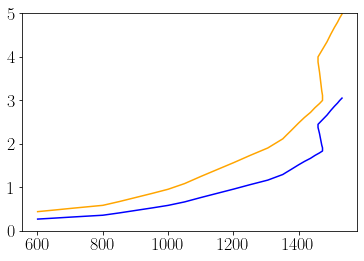

In [73]:
fig, ax = plt.subplots(1,1)

#ax.plot(g4_ppU1tau_139_CMS_beta10, mLQ_ppU1tau_139_CMS)

ax.plot(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta10_sorted, color = 'orange')
ax.plot(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta11_sorted, color = 'blue')


ax.set_ylim(0, 5)

plt.show()

The combination of $pp \to U_1 \tau$ and $pp \to U_1 U_1^\dagger$, from the same CMS paper:

In [74]:
mLQ_single_double_137_CMS_beta11 = np.array([1770.637786, 1777.376655, 1780.264741, 1784.115523, 1789.891697, 1796.630566,
1803.369434, 1810.108303, 1814.921781, 1819.735259, 1826.474128, 1834.175692, 1857.280385, 1845.728039, 1869.795427])
gLQ_single_double_137_CMS_beta11 = np.array([0.504143646, 0.645027624, 0.740331492, 0.852209945, 0.972375691, 1.14640884,
1.291436464, 1.482044199, 1.610497238, 1.730662983, 1.908839779, 2.053867403, 2.339779006, 2.198895028, 2.501381215])

single_double_137_CMS_beta11 = interpolejsn.interp1d(mLQ_single_double_137_CMS_beta11, gLQ_single_double_137_CMS_beta11, kind='linear', fill_value='extrapolate')

$R(D)$ bounds, $\beta_R = 1$:

In [75]:
mLQ_rD_beta11 = np.array([1000, 3000])
gLQ_rD_upper_beta11 = np.array([1.1068702, 3.2671755])

gLQ_rD_lower_beta11 = np.array([0.455470, 1.368956743])


rD_upper_beta11 = interpolejsn.interp1d(mLQ_rD_beta11, gLQ_rD_upper_beta11, kind = 'linear', fill_value = 'extrapolate')
rD_lower_beta11 = interpolejsn.interp1d(mLQ_rD_beta11, gLQ_rD_lower_beta11, kind = 'linear', fill_value = 'extrapolate')

### Moneyplots number 2

Plots with only the bounds from Gino + our bounds:

# $\beta_L^{33} = 1, \beta_R^{33} = 0$ :

$\sigma$ will scale as 1/2, so the coupling limits as $\sqrt{2}$ (we have a fixed width, so not g^4).\
Furthermore, switch the Branching Ratios, since our limits were derived with the beta11 branching ratio. g_lim ~ 1/sqrt(BR)

In [76]:
cmsGreen = '#116D6E'
terraCota = '#ba5f4c'

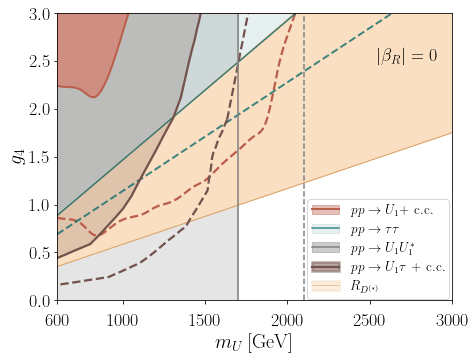

In [77]:
rescalefac = np.sqrt(2*bran_ratio_beta11/bran_ratio_beta10) 

fig, ax = plt.subplots(1, 1, figsize=(7.1, 5.5))

#ax.plot(mlq_masses_smooth, rescalefac*g4_limits_beta11_LO_13TeV_smooth(mlq_masses_smooth),  color = lo_color, alpha = 1, linewidth = 2, label = r'LO, $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
s_chan_lims, = ax.plot(mlq_masses_smooth[0:150], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth[0:150]),  color = terraCota, alpha = 1, linewidth = 2,  label = r'$pp \to U_1$ + c.c.') #our bounds for betaL = betaR = 1

ax.plot(mlq_masses_smooth, rescalefac*g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth),  color = terraCota, linestyle = 'dashed', linewidth = 2.25, alpha = 1) #our bounds

s_channel_res = interpolejsn.interp1d(mlq_masses_smooth[0:440], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth[0:440]), fill_value = 'extrapolate')
#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Lines:

x_plotting_lims = [600, 3000]

#pp \to \tau \tau ATLAS
#ax.plot(x_plotting_lims, ppTauTauATLAS_139_beta10(x_plotting_lims), color = purpleColors[0], linestyle = 'solid', label = r'$pp \to \tau \tau$, ATLAS')  #pp->tautau, 139 fb^-1, \beta_R = 0
#ax.plot(x_plotting_lims, ppTauTauATLAS_3000_beta10(x_plotting_lims), color = purpleColors[0], linestyle = 'dashed')  #pp->tautau, 3 ab^-1, \beta_R = 0

#RD RDstar - to accommodate the anomaly
rdrdstar, =  ax.plot(x_plotting_lims,rD_beta10_upper(x_plotting_lims), color = '#d9a166', linestyle = 'solid', linewidth = 1, label = r'$R_{D^{(\ast)}}$')
ax.plot(x_plotting_lims,rD_beta10_lower(x_plotting_lims), color = '#d9a166', linewidth = 1, linestyle = 'solid')


#pp \to \tau \tau CMS
tautauCMS, = ax.plot(x_plotting_lims, ppTauTauCMS_beta10(x_plotting_lims), color = cmsGreen, linewidth = 1.5, linestyle = 'solid', alpha = 0.8, label = r'$pp \to \tau \tau$, CMS')  #pp->tautau, 139 fb^-1, \beta_R = 0
ax.plot(x_plotting_lims, ppTauTauCMS_beta10_3000(x_plotting_lims), color = cmsGreen, linewidth = 2, alpha = 0.8, linestyle = 'dashed') #pp -> tautau, 3 ab^-1, beta_R = 0, CMS, scaled as ATLAS



#pp \to U_1 \tau - UPDATED
singleprodCMS, = ax.plot(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta10_sorted, color = cmsBrown, linewidth = 2.25, label = r'$pp \to U_1 \tau$') #pp->U_1 \tau, single prod., CMS
ax.plot(mLQ_ppU1tau_139_CMS_HL, ppU1tau_139_CMS_beta10_HL(mLQ_ppU1tau_139_CMS_HL), color = cmsBrown, linewidth = 2.25, linestyle = 'dashed') #pp->U_1 \tau, single prod., CMS

#The extrapolated part:
ax.plot([mLQ_ppU1tau_139_CMS_HL[-1], 2200], ppU1tau_139_CMS_beta10_HL([mLQ_ppU1tau_139_CMS_HL[-1], 2200]), color = cmsBrown, linewidth = 2.25, linestyle = 'dashed') #pp->U_1 \tau, single prod., CMS


#pp \to U_1 U_1
u1doubleprod, = ax.plot(mLQ_ppU1U1_139, gLQ_ppU1U1_139, color = 'gray', label = r'$pp \to U_1 U_1^\ast $', linestyle = 'solid') # pp -> U1 U1
ax.plot(mLQ_ppU1U1_3000, gLQ_ppU1U1_3000, color = 'gray', linestyle = 'dashed') # pp -> U1 U1 - 3 ab^-1


#Filling the plot
#ax.fill_between(m4_limits_beta11_LO, rescalefac*g4_vals, y2 = 30, color=niceBlueColors[0], alpha = 0.3) #For the LO curve
#ax.fill_between(mlq_masses_smooth[0:160], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth[0:160]), y2 = 30, color='#004F92', alpha = 0.5) #For the NLO curve
#ax.fill_between([0, 1701], [0], [15], alpha = 0.15, color = 'gray') #For the pp->U1U1 bound
#ax.fill_between(mLQ_ppTauTauATLAS_139_betaR0, gLQ_ppTauTauATLAS_139_betaR0, y2 = 10, color = niceGreenColors[0], alpha = 0.3)
#ax.fill_between(mLQ_ppTauTauCMS_betaR0, gLQ_ppTauTauCMS_betaR0, y2 = 10, color = niceGreenColors[1], alpha = 0.3)
ax.fill_between([0, 1701], [0], [15], alpha = 0.2, color = 'gray') #For the pp -> U1 U1 bound

#ax.fill_between(mlq_masses_smooth[0:440], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = 'maroon', alpha = 0.35) #For our NLO curve
#ax.fill_between(x_plotting_lims, ppTauTauATLAS_139_beta10(x_plotting_lims), y2 = 3, color = purpleColors[0], alpha = 0.2) # pp -> tau tau ATLAS bounds
ax.fill_between(x_plotting_lims, ppTauTauCMS_beta10(x_plotting_lims), y2 = s_channel_res(x_plotting_lims), color = cmsGreen, alpha = 0.1) # pp -> tau tau CMS bounds
ax.fill_between(x_plotting_lims, rD_beta10_upper(x_plotting_lims), rD_beta10_lower(x_plotting_lims), color=orangeGinobetaR0, alpha = 1, label = r'$R_{D^{\ast}}$') #RD / RDstar
ax.fill_between(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta10_sorted, y2 = 10, color = cmsBrown, alpha = 0.2)
ax.fill_between(mlq_masses_smooth[0:440], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = 'white', alpha = 1) #For our NLO curve
ax.fill_between(mlq_masses_smooth[0:440], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = terraCota, alpha = 0.7) #For our NLO curve


#LEGEND
p2_s_chan, = [plt.Rectangle((0, 0), 0, 0, facecolor=terraCota, alpha = 0.4,  edgecolor = terraCota)]

p2_cms, = [plt.Rectangle((0, 0), 0, 0, facecolor=cmsGreen, alpha = 0.1,  edgecolor = cmsGreen)]

p2_u1double, = [plt.Rectangle((0, 0), 0, 0, facecolor='gray', alpha = 0.4,  edgecolor = 'gray')]

p2_rdstar, = [plt.Rectangle((0, 0), 0, 0, facecolor=orangeGinobetaR0, linewidth = 2.75, alpha = 0.5,  edgecolor=orangeGinobetaR0)]

p2_single, = [plt.Rectangle((0, 0), 0, 0, facecolor=cmsBrown, linewidth = 2.5, alpha = 0.5,  edgecolor=cmsBrown)]



lines = []
lines += ((s_chan_lims, p2_s_chan ),)
lines += ((tautauCMS, p2_cms),)
lines += ((u1doubleprod, p2_u1double),)

lines += ((singleprodCMS, p2_single), )

lines += ((rdrdstar, p2_rdstar),)

labels = [r'$pp \to U_1 + $ c.c.', r'$pp \to \tau \tau$', r'$pp \to U_1 U_1^\ast $', r'$pp \to U_1 \tau$ + c.c.', r'$R_{D^{(\ast)}}$']

ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 3)

ax.set_xticks([600, 1000, 1500, 2000, 2500, 3000])
ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3])
ax.text(x = 2550, y = 2.5, s = r'$|\beta_R| = 0$', fontsize = 18)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 

#ax.legend(loc=2, bbox_to_anchor=(0.615, 0.34), fontsize = 14)
#ax.legend(lines, labels, loc = 4, numpoints=1, fontsize = 14)
ax.legend(lines, labels, loc = 4, bbox_to_anchor=(1.01, -0.018), numpoints=1, fontsize = 13.5)


fig.tight_layout(pad = 2.5)
#fig.savefig('param_space_limits_U1_bTau_beta10_obsPresent_expFuture.pdf')
plt.show()
plt.close()

In [78]:
mlq_masses_smooth[45]

825

In [79]:
1/((g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth[45]))/(g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth[45])))

0.32069643209417514

In [80]:
np.sqrt(np.sqrt(139/3000))

0.46395235805648466

# $\beta_L^{33} = \beta_R^{33} = 1$:

In [81]:
for i in range(0,200, 10):
    print(mlq_masses_smooth[i], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[i]/g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth)[i])

600 2.5975306537704412
650 2.624217419431114
700 2.6525359757299696
750 2.7587332283440666
800 3.0020552606622783
850 3.173739344025903
900 3.1690568318849848
950 3.1922291400527296
1000 3.3379313026190363
1050 3.5439655240577568
1100 3.665762831352173
1150 3.6977540665407167
1200 3.6990947723094116
1250 3.739220477729469
1300 3.830714835907234
1350 4.006004156042873
1400 4.344682213315456
1450 5.006760060169302
1500 6.007031241858749
1550 7.181812166077903


In [82]:
print(mlq_masses_smooth[80], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[80], g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth)[80], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[80]/g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth)[80] )

1000 1.7071997542489088 0.5114544307455912 3.3379313026190363


In [83]:
mLQ_ppU1tau_139_CMS_beta11_sorted[8], g4_ppU1tau_139_CMS_beta11_sorted[8], 

(1000.0, 0.585795)

In [84]:
mLQ_ppU1tau_139_CMS_HL[7], ppU1tau_139_CMS_beta11_HL(mLQ_ppU1tau_139_CMS_HL[7]), (ppU1tau_139_CMS_beta11_HL(mLQ_ppU1tau_139_CMS_HL[7])/g4_ppU1tau_139_CMS_beta11_sorted[8])**(-1)

(1022.94, array(0.200463), 2.9222100836563354)

In [138]:
#fig, ax = plt.subplots(1, 1, figsize=(6.5, 5.5))
fig, ax = plt.subplots(1, 1, figsize=(7.1, 5.5))

#The interpolated curves:
#ax.plot(mlq_masses_smooth[0:200], g4_limits_beta11_LO_13TeV_smooth(mlq_masses_smooth)[0:200],   color = lo_color, alpha = 1, linewidth = 2, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
s_chan_lims, = ax.plot(mlq_masses_smooth[0:440], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440],  color = terraCota, alpha = 1, linewidth = 2,  label = r'$pp \to U_1 + $ c.c.') #our bounds for betaL = betaR = 1

#ax.plot(mlq_masses_smooth, g4_limits_beta11_LO_14TeV_smooth(mlq_masses_smooth),   color = '#009DCF', linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'LO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
ax.plot(mlq_masses_smooth, g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth),  color = terraCota, linestyle = 'dashed', linewidth = 2.25, alpha = 1) #our bounds

#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Bounds from other experiments:

x_plotting_lims = [600, 3000]

# $137 \mathrm{fb}^{-1}$

#pp \to \tau \tau - ATLAS
#ax.plot(x_plotting_lims, ppTauTauATLAS_139_beta11(x_plotting_lims), color = purpleColors[0], linestyle = 'solid', label = r'$pp \to \tau \tau$, ATLAS')  #pp->tautau, 139 fb^-1, \beta_R = 1 
#ax.plot(x_plotting_lims, ppTauTauATLAS_3000_beta11(x_plotting_lims), color = purpleColors[0], linestyle = 'dashed')  #pp->tautau, 3 ab^-1, \beta_R = 1

#pp \to \tau \tau - CMS
tautauCMS, = ax.plot(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), color = cmsGreen, linewidth = 2, alpha = 0.8, linestyle = 'solid', label = r'$pp \to \tau \tau$, CMS')  #pp->tautau, 139 fb^-1, \beta_R = 1 
ax.plot(x_plotting_lims, ppTauTauCMS_beta11_3000(x_plotting_lims), color = cmsGreen, linewidth = 2, alpha = 0.8, linestyle = 'dashed') #pp -> tautau, 3 ab^-1, beta_R = 0, CMS, scaled as ATLAS

#RD RDstar - to accommodate the anomaly
RdRdStar, = ax.plot(x_plotting_lims,rD_upper_beta11(x_plotting_lims), color = purpleColors[0], linewidth = 1., alpha = 0.8, linestyle = 'solid', label = r'$R_{D^\ast}$') 
ax.plot(x_plotting_lims,rD_lower_beta11(x_plotting_lims), color = purpleColors[0], alpha = 0.8, linewidth = 1., linestyle = 'solid')


#pp \to U_1 \tau 
singleProd, = ax.plot(mLQ_ppU1tau_139_CMS_beta11_sorted, g4_ppU1tau_139_CMS_beta11_sorted, color = cmsBrown, linewidth = 2, label = r'$pp \to U_1 \tau$') #pp->U_1 \tau, single prod., CMS
ax.plot(mLQ_ppU1tau_139_CMS_HL, ppU1tau_139_CMS_beta11_HL(mLQ_ppU1tau_139_CMS_HL), color = cmsBrown, linewidth = 2, linestyle = 'dashed') #pp->U_1 \tau, single prod., CMS

#The extrapolated part:
ax.plot([mLQ_ppU1tau_139_CMS_HL[-1], 2200], ppU1tau_139_CMS_beta11_HL([mLQ_ppU1tau_139_CMS_HL[-1], 2200]), color = cmsBrown, linewidth = 2, linestyle = 'dashed') #pp->U_1 \tau, single prod., CMS


#pp \to U_1 U_1
u1doubleprod, = ax.plot(mLQ_ppU1U1_139, gLQ_ppU1U1_139, color = 'gray', label = r'$pp \to U_1 U_1^\ast $', linestyle = 'solid') # pp -> U1 U1
ax.plot(mLQ_ppU1U1_3000, gLQ_ppU1U1_3000, color = 'gray', linestyle = 'dashed') # pp -> U1 U1 - 3 ab^-1

#ax.plot(x_plotting_lims, [4*np.pi, 4*np.pi], color = 'black', linestyle = 'dashed', label = r'$g_4 = 4 \pi$')


#Filling the plot

ax.fill_between([0, 1701], [0], [15], alpha = 0.2, color = 'gray') #For the pp -> U1 U1 bound
ax.fill_between(x_plotting_lims, rD_upper_beta11(x_plotting_lims), rD_lower_beta11(x_plotting_lims), color=purpleColors[2], alpha = 0.4) #RD / RDstar
ax.fill_between(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), y2 = 3, color = cmsGreen, alpha = 0.1) # pp -> tau tau CMS bounds
#ax.fill_between(x_plotting_lims, ppTauTauATLAS_139_beta11(x_plotting_lims), y2 = 3, color = purpleColors[0], alpha = 0.3) # pp -> tau tau ATLAS bounds
ax.fill_between(mLQ_ppU1tau_139_CMS_beta11_sorted, g4_ppU1tau_139_CMS_beta11_sorted, y2 = 10, color = cmsBrown, alpha = 0.2) # Single production
ax.fill_between(mlq_masses_smooth[0:440], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = 'white', alpha = 1) #For the NLO curve
ax.fill_between(mlq_masses_smooth[0:440], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = terraCota, alpha = 0.7) #For the NLO curve

#Turn on the single LQ limits, but not certain if they are correct
#ax.fill_between(mLQ_ppU1tau_137_CMS_beta11, ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), y2 = 10, color = '#116D6E', alpha = 0.2)
p2_s_chan, = [plt.Rectangle((0, 0), 0, 0, facecolor=terraCota, alpha = 0.4,  edgecolor=terraCota)]

p2_cms, = [plt.Rectangle((0, 0), 0, 0, facecolor=cmsGreen, alpha = 0.1,  edgecolor=cmsGreen)]

p2_u1double, = [plt.Rectangle((0, 0), 0, 0, facecolor='gray', alpha = 0.4,  edgecolor = 'gray')]

p2_rdstar, = [plt.Rectangle((0, 0), 0, 0, facecolor=purpleColors[2], alpha = 0.4,  edgecolor=purpleColors[2])]




lines = []
lines += ((s_chan_lims, p2_s_chan ),)

lines += ((RdRdStar, p2_rdstar),)

lines += ((singleprodCMS, p2_single), )

lines += ((u1doubleprod, p2_u1double),)

lines += ((tautauCMS, p2_cms),)




#labels = [r'$pp \to U_1 + $ c.c.', r'$pp \to \tau \tau$', r'$pp \to U_1 U_1^\ast $', r'$pp \to U_1 \tau$ + c.c.', r'$R_{D^{(\ast)}}$']
labels = [r'$pp \to U_1 + $ c.c.',  r'$R_{D^{(\ast)}}$', r'$pp \to U_1 \tau$ + c.c.', r'$pp \to U_1 U_1^\ast $', r'$pp \to \tau \tau$']



#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600] + [1000 + i*500 for i in range(5)])
#ax.set_yticks([0.2, 0.3, 2, 4, 6, 8])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 3)
ax.set_yticks([int(0)] + [0.5, 1, 1.5, 2, 2.5, 3])
ax.text(x = 2550, y = 2.5, s = r'$|\beta_R| = 1$', fontsize = 18)

#ax.legend(loc=2, bbox_to_anchor=(0.53, 0.33), fontsize = 14)
#ax.legend(loc=2, bbox_to_anchor=(0.615, 0.34), fontsize = 14)

ax.legend(lines, labels, loc = 4, bbox_to_anchor=(1.01, -0.018), numpoints=1, fontsize = 13.5)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 



fig.tight_layout(pad=2.5)
#fig.savefig("param_space_limits_U1_bTau_beta11_obsPresent_expFuture.pdf")
fig.savefig("limits_U1_bTau_beta11_fourth.jpeg", dpi = 900)

#plt.show()
plt.close()

Better maybe: Do current bounds as observed, future bounds as expected with projection.

$pp \to \tau \tau, L = 139 \mathrm{fb}^{-1}$ is from ATLAS, i.e. we took the bounds from this paper from Javi and Zurich group.\
$pp \to U_1 \tau, L = 137 \mathrm{fb}^{-1}$ is from this CMS paper.\
$pp \to U_1 U_1^\dagger,  L = 139 \mathrm{fb}^{-1}$ is from CMS too, I thought it's from the same paper \
ACTUALLY, most up-to-date results: https://browse.arxiv.org/pdf/2308.07826.pdf \
These are the most constraining single and double LQ production bounds. For $pp \to \tau \tau$, check ATLAS.
It's also a bit problematic that you cannot find the ones for $\beta_R = 0$.

# Plots for the referee

First plot - Expected over observed limits

In [86]:
#Single production

mLQ_ppU1tau_139_CMS = np.array([
600.917, 651.376, 699.541, 750., 800.459, 850.917, 901.376, 951.835, 
1000., 1050.46, 1100.92, 1149.08, 1201.83, 1250., 1305.05, 1350.92, 
1399.08, 1449.54, 1472.48, 1470.18, 1467.89, 1463.3, 1458.72, 
1461.01, 1458.72, 1470.18, 1486.24, 1497.71, 1509.17, 1518.35, 
1525.23, 1532.11, 1376.15, 1362.39, 1417.43, 1435.78, 1463.3, 
1472.48, 1465.6])


g4_ppU1tau_139_CMS_beta11 = np.sqrt(2)*np.array([
0.221, 0.2391, 0.2572, 0.2754, 0.2935, 0.337, 0.3841, 0.4312, 
0.4783, 0.5435, 0.6268, 0.7029, 0.7862, 0.8659, 0.9529, 1.058, 
1.2391, 1.4167, 1.5, 1.6087, 1.6812, 1.8261, 1.942, 1.8841, 2., 
2.0725, 2.1739, 2.2609, 2.3406, 2.3986, 2.4493, 2.4928, 1.1522, 
1.1014, 1.3043, 1.3623, 1.4638, 1.558, 1.7536])


g4_ppU1tau_139_CMS_beta11_argsorted = np.argsort(g4_ppU1tau_139_CMS_beta11)
mLQ_ppU1tau_139_CMS_beta11_sorted = mLQ_ppU1tau_139_CMS[g4_ppU1tau_139_CMS_beta11_argsorted]
g4_ppU1tau_139_CMS_beta11_observed = g4_ppU1tau_139_CMS_beta11[g4_ppU1tau_139_CMS_beta11_argsorted]

mLQ_ppU1tau_139_CMS_expected = np.array([
573.395, 619.266, 665.138, 729.358, 788.991, 853.211, 912.844,
972.477, 1022.94, 1100.92, 1146.79, 1188.07, 1233.95, 1270.64, 
1316.51, 1353.21, 1380.73, 1399.08, 1417.43, 1440.37, 1463.3,
1490.83, 1513.76, 1518.35, 1522.94, 1529.82, 1536.7, 1541.28,
1550.46, 1564.22, 1573.39, 1587.16, 1605.5, 1614.68, 1623.85, 1633.03]) 



g4_ppU1tau_139_CMS_beta11_expected = np.sqrt(2)*np.array([
0.1884, 0.2029, 0.2174, 0.2391, 0.2609, 0.2826, 0.3043, 0.3623, 
0.413, 0.4928, 0.5652, 0.6377, 0.7246, 0.7971, 0.8768, 0.9493, 
0.9928, 1.0652, 1.1377, 1.2174, 1.3043, 1.413, 1.5, 1.587, 1.6522, 
1.7464, 1.8478, 1.9493, 2.0362, 2.1014, 2.1667, 2.2464, 2.3333, 
2.3913, 2.442, 2.4928])

#I need the interpolation, since the curves have different points!
ppU1tau_139_CMS_beta11_observed_interpolated = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_sorted, g4_ppU1tau_139_CMS_beta11_observed, kind='linear')

ppU1tau_139_CMS_beta11_expected_interpolated = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_expected, g4_ppU1tau_139_CMS_beta11_expected, kind='linear')

#Now, the ratio

singleProd_expobs_ratio = np.array(ppU1tau_139_CMS_beta11_expected_interpolated(mLQ_ppU1tau_139_CMS_sorted)[0:22]/ppU1tau_139_CMS_beta11_observed_interpolated(mLQ_ppU1tau_139_CMS_sorted)[0:22])
singlePord_expobs_ratio_interpolated = interpolejsn.interp1d(mLQ_ppU1tau_139_CMS_sorted[0:22], singleProd_expobs_ratio, kind = 'linear')

#Resonant

mlq_masses = [600 + 75*i for i in range(27)]


g4_observed_resProd = np.array([1.35948004, 1.35124812, 1.32917336, 1.28718128, 1.3960538 ,
       1.6195071 , 1.86669429, 2.02143915, 2.18759582, 2.32789346,
       2.63563305, 3.31818802,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan]) #1425

g4_expected_resProd = np.array([1.13312878, 1.10591223, 1.04100829, 0.8694049 , 0.94293278,
       1.0743282 , 1.19971957, 1.3245301 , 1.57142425, 1.67774011,
       1.86335175, 2.07038615, 2.17283327, 2.35088686, 2.53371872,
       2.7499369 ,        np.nan,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan,        np.nan,        np.nan,        np.nan,
              np.nan,        np.nan])

#It is clear that in the resonant production, the expected limits are better! exp<obs => exp/obs < 1

g4_exp_obs_ratio = np.array(g4_expected_resProd/g4_observed_resProd)
g4_exp_obs_ratio_interpolated = interpolejsn.interp1d(mlq_masses, g4_exp_obs_ratio, kind = 'linear')



fig, ax = plt.subplots(1,1, figsize=(7, 5))

ax.plot(mLQ_ppU1tau_139_CMS_sorted[0:22], singleProd_expobs_ratio, color = niceBlueColorForLine[0], linestyle = 'solid', linewidth = 2,  label = r'Exp/Obs, Single prod') 

ax.plot(mlq_masses, g4_exp_obs_ratio,  color = niceGreenColors[0], linestyle = 'solid', linewidth = 2, label = r'Exp/Obs, Res prod') 

ax.plot([0, 3000], [1, 1], linestyle = 'dashed', linewidth = 0.75, color = 'black', alpha = 0.5)


ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r"$g_{4}^{\rm exp. \, lim.}/g_{4}^{\rm obs. \, lim.}$", fontsize = 20)


x_plotting_lims = [600, 1500]



ax.set_title(r"Ratio between the expected and observed limits", fontsize = 18)
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600] + [1000 + i*500 for i in range(3)])

ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 1.75)


ax.legend(loc = 1, fontsize = 13.5)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 



fig.tight_layout(pad=2.5)
fig.savefig("u1-referee-plot-1.pdf")
#plt.show()
plt.close()

In [87]:
g4_exp_obs_ratio

array([0.83350159, 0.81843757, 0.78319979, 0.67543314, 0.67542725,
       0.66336739, 0.6426974 , 0.65524114, 0.71833391, 0.72071172,
       0.70698451, 0.62395082,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan])

Second plot: The square root of cross-sections

In [88]:
xsec13to14Ratio_resonant_g4_1 = np.sqrt(xsec_U1_NLO_beta11_13TeV_bwgen1[:,2]/xsec_U1_NLO_beta11_14TeV_bwgen1[:,2]) # g4 = 1
xsec13to14Ratio_resonant_g4_2 = np.sqrt(xsec_U1_NLO_beta11_13TeV_bwgen1[:,4]/xsec_U1_NLO_beta11_14TeV_bwgen1[:,4]) # g4 = 2


res_masses = [600, 800, 1000, 1200, 1400, 1600, 2000] + [2200, 2400, 2600]

singleProd_masses = 1000.*np.array([0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1., 1.05, 1.1, 1.15, 
1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 
1.8, 1.85, 1.9, 1.95, 2., 2.05, 2.1, 2.15, 2.2, 2.25])

xsec14_singleProd = np.array([0.2177, 0.1395, 0.09222, 0.06187, 0.04223, 0.02943, 
   0.02077, 0.01491, 0.01078, 0.007917, 0.005832, 0.004369, 0.003285, 
   0.002497, 0.001905, 0.001467, 0.001134, 0.0008821, 0.0006888, 
   0.0005402, 0.0004263, 0.0003386, 0.0002693, 0.0002149, 0.0001723, 
   0.0001383, 0.0001119, 9.054e-5, 7.345e-5, 5.943e-5, 
   4.87e-5, 3.985e-5, 3.259e-5, 2.688e-5])

xsec13_singleProd = np.array([0.1699, 0.1079, 0.07083, 0.04714, 0.03194, 0.02209, 0.01551, 
  0.01103, 0.007916, 0.005781, 0.004228, 0.003142, 0.002342, 
  0.001768, 0.00134, 0.001024, 0.0007862, 0.0006065, 0.00047, 
  0.0003663, 0.000287, 0.0002263, 0.0001787, 0.0001415, 0.0001126, 
  8.969e-5, 7.203e-5, 5.79e-5, 4.668e-5, 3.736e-5, 
  3.041e-5, 2.467e-5, 1.999e-5, 1.635e-5])

xsec13to14Ratio_singleProd = np.sqrt(xsec13_singleProd/xsec14_singleProd)

#Need the interpolation for l8er
xsec13to14Ratio_resonant_g4_1_interpolated = interpolejsn.interp1d(res_masses, xsec13to14Ratio_resonant_g4_1, kind='linear')

xsec13to14Ratio_resonant_g4_2_interpolated = interpolejsn.interp1d(res_masses, xsec13to14Ratio_resonant_g4_2, kind='linear')

xsec13to14Ratio_singleProd_interpolated = interpolejsn.interp1d(singleProd_masses, xsec13to14Ratio_singleProd, kind='linear')


fig, ax = plt.subplots(1,1, figsize=(7, 5))

ax.plot(res_masses, xsec13to14Ratio_resonant_g4_1, color = niceGreenColors[0], linestyle = 'solid', linewidth = 2,  label = r'$\sqrt{\sigma_{\rm 13 \, TeV}/\sigma_{\rm 14 \, TeV}}$, $g_4 = 1$, res prod') 

#ax.plot(res_masses, xsec13to14Ratio_resonant_g4_2, color = niceGreenColors[0], linestyle = 'solid', linewidth = 2,  label = r'$\sqrt{\sigma_{\rm 13 \, TeV}/\sigma_{\rm 14 \, TeV}}$, $g_4 = 2$, res prod') 


ax.plot(singleProd_masses, xsec13to14Ratio_singleProd,  color = niceBlueColorForLine[0], linestyle = 'solid', linewidth = 2, label = r'$\sqrt{\sigma_{\rm 13 \, TeV}/\sigma_{\rm 14 \, TeV}}$, single prod') 

ax.plot([0, 3000], [1, 1], linestyle = 'dashed', linewidth = 0.75, color = 'black', alpha = 0.5)


ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r"$\sqrt{\sigma_{\rm 13 \, TeV}/\sigma_{\rm 14 \, TeV}}$", fontsize = 20)


x_plotting_lims = [600, 1500]



#ax.set_title(r"Ratio between the expected and observed limits", fontsize = 18)
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600] + [1000 + i*500 for i in range(3)])

ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 1.75)


ax.legend(loc = 4, fontsize = 13.5)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 



fig.tight_layout(pad=2.5)
fig.savefig("u1-referee-plot-2.pdf")
#plt.show()
plt.close()

Final plot: Multiplication of these two plots, pointwise:

In [89]:
print(mLQ_ppU1tau_139_CMS_sorted[0:20])

#Now, the product

def singleProd_totalEnhancement(x): return singlePord_expobs_ratio_interpolated(x)*xsec13to14Ratio_singleProd_interpolated(x)

def resProd_totalEnhancement_g4_1(x): return g4_exp_obs_ratio_interpolated(x)*xsec13to14Ratio_resonant_g4_1_interpolated(x)

def resProd_totalEnhancement_g4_2(x): return g4_exp_obs_ratio_interpolated(x)*xsec13to14Ratio_resonant_g4_2_interpolated(x)


fig, ax = plt.subplots(1,1, figsize=(7, 5))

ax.plot(mLQ_ppU1tau_139_CMS_sorted[0:22], singleProd_totalEnhancement(mLQ_ppU1tau_139_CMS_sorted[0:22]), color = niceBlueColorForLine[0], linestyle = 'solid', linewidth = 2,  label = r'Total enhancement, Single prod') 

ax.plot(mLQ_ppU1tau_139_CMS_sorted[0:30], resProd_totalEnhancement_g4_1(mLQ_ppU1tau_139_CMS_sorted[0:30]),  color = niceGreenColors[0], linestyle = 'solid', linewidth = 2, label = r'Total enhancement, Res prod, $g_4 = 1$') 

#ax.plot(mLQ_ppU1tau_139_CMS_sorted[0:30], resProd_totalEnhancement_g4_2(mLQ_ppU1tau_139_CMS_sorted[0:30]),  color = niceGreenColors[2], linestyle = 'solid', linewidth = 2, label = r'Total enhancement, Res prod, $g_4 = 2$') 


ax.plot([0, 3000], [1, 1], linestyle = 'dashed', linewidth = 0.75, color = 'black', alpha = 0.5)


ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r"$g_{4}^{\rm exp. \, lim.}/g_{4}^{\rm obs. \, lim.} \times \sqrt{\sigma_{13}/\sigma_{14}}$", fontsize = 20)


x_plotting_lims = [600, 1500]



ax.set_title(r"Ratio between the expected and observed limits", fontsize = 18)
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600] + [1000 + i*500 for i in range(3)])

ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 1.75)


ax.legend(loc = 1, fontsize = 13.5)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 



fig.tight_layout(pad=2.5)
fig.savefig("u1-referee-plot-3.pdf")
#plt.show()
plt.close()

[ 600.917  651.376  699.541  750.     800.459  850.917  901.376  951.835
 1000.    1050.46  1100.92  1149.08  1201.83  1250.    1305.05  1350.92
 1362.39  1376.15  1399.08  1417.43 ]


As for the other cases, find now solutions for the coupling $g_U$ which satisfy the exclusion limits:

In [90]:
def xsec_U1_LO_RD_13TeV_g4(g4, mLQ):
    return (g4**2)*xsec_U1_LO_RD_13TeV_nom(mLQ)

def xsec_U1_LO_RD_14TeV_g4(g4, mLQ):
    return (g4**2)*xsec_U1_LO_RD_14TeV_nom(mLQ)


Array of couplings:

In [91]:
g4_vals = np.array([0 + i*0.2 for i in range(70)])

Now define the curves $\Delta f(g_4, m_{\mathrm{LQ}}) = \sigma_{\mathrm{U1}}(g_4, m_{\mathrm{LQ}}) - \mathrm{exp}_{\mathrm{95 \% CL}}(m_{\mathrm{LQ}})$:

In [92]:
def delta_xsec_U1_LO_RD_13TeV_g4(g4, mLQ):
    return xsec_U1_LO_RD_13TeV_g4(g4, mLQ) - funkCentral(mLQ)

def delta_xsec_U1_LO_RD_14TeV_g4(g4, mLQ):
    return xsec_U1_LO_RD_14TeV_g4(g4, mLQ) - funkCentral(mLQ)


Save the solutions in np.arrays:

In [93]:
m4_limits_RD_13TeV_LO = np.zeros(shape = (len(g4_vals)))
m4_limits_RD_14TeV_LO = np.zeros(shape = (len(g4_vals)))            

Solutions for the 13 TeV case:

In [94]:
for g4index, g4 in enumerate(g4_vals):
    def delta_xsec_U1_LO_RD_13TeV_g4_fixed(mLQ): 
        return delta_xsec_U1_LO_RD_13TeV_g4(g4, mLQ)
    
    try:
        solusn_LO = optimizejsn.brentq(delta_xsec_U1_LO_RD_13TeV_g4_fixed, mLQ_vals[0], mLQ_vals[-1])
        #print(solusn_LO)
        m4_limits_RD_13TeV_LO[g4index] = solusn_LO
    except:
        m4_limits_RD_13TeV_LO[g4index] = np.nan
        #print("No LO solution")

Solutions for the 14 TeV case:

In [95]:
for g4index, g4 in enumerate(g4_vals):
    def delta_xsec_U1_LO_RD_14TeV_g4_fixed(mLQ): 
        return delta_xsec_U1_LO_RD_14TeV_g4(g4, mLQ)
    
    try:
        solusn_LO = optimizejsn.brentq(delta_xsec_U1_LO_RD_14TeV_g4_fixed, mLQ_vals[0], mLQ_vals[-1])
        #print(solusn_LO)
        m4_limits_RD_14TeV_LO[g4index] = solusn_LO
    except:
        m4_limits_RD_14TeV_LO[g4index] = np.nan
        #print("No LO solution")

Compare them: 

In [96]:
for lim_13TeV, lim_14TeV in zip(m4_limits_RD_13TeV_LO, m4_limits_RD_14TeV_LO):
    print(lim_13TeV, lim_14TeV)

nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


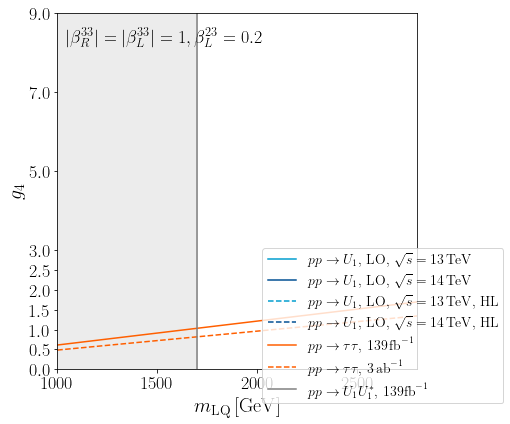

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(7, 6))

s13TeV_curve = ax.plot(m4_limits_RD_13TeV_LO, g4_vals,  color = lo_color, alpha = 1, label = r'$pp \to U_1$, LO, $\sqrt{s} = 13 \, \mathrm{TeV}$') #our bounds
s14TeV_curve = ax.plot(m4_limits_RD_14TeV_LO, g4_vals,  color = nlo_color, alpha = 1, label = r'$pp \to U_1$, LO, $\sqrt{s} = 14 \, \mathrm{TeV}$') #our bounds

s13TeV_curve_HL = ax.plot(m4_limits_RD_13TeV_LO, ((138/3000)**0.25)*g4_vals, color = lo_color, linestyle = 'dashed',  alpha = 1, label = r'$pp \to U_1$, LO, $\sqrt{s} = 13 \, \mathrm{TeV}$, HL')
s14TeV_curve_HL = ax.plot(m4_limits_RD_14TeV_LO, ((138/3000)**0.25)*g4_vals, color = nlo_color, linestyle = 'dashed', alpha = 1, label = r'$pp \to U_1$, LO, $\sqrt{s} = 14 \, \mathrm{TeV}$, HL')
 

#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Lines:

x_plotting_lims = [1000, 2800]

ax.plot(x_plotting_lims, ppTauTauATLAS_139_beta11(x_plotting_lims), color = niceOrangeColors[0], linestyle = 'solid', label = r'$pp \to \tau \tau$, $139 \, \mathrm{fb}^{-1}$')  #pp->tautau, 139 fb^-1, \beta_R = 0 
ax.plot(x_plotting_lims, ppTauTauATLAS_3000_beta11(x_plotting_lims), color = niceOrangeColors[0], linestyle = 'dashed', label = r'$pp \to \tau \tau$, $3 \, \mathrm{ab}^{-1}$')  #pp->tautau, 3 ab^-1, \beta_R = 0 
#ax.plot(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), color = niceOrangeColors[2], label = r'$pp \to \tau \tau$, CMS,  $139 \mathrm{fb}^{-1}$') #pp->tautau, CMS, \beta_R = 0

ax.plot(mLQ_ppU1U1_139, gLQ_ppU1U1_139, color = 'gray', label = r'$pp \to U_1 U_1^\ast $,  $139 \mathrm{fb}^{-1}$') # pp -> U1 U1

#ax.plot(x_plotting_lims, [4*np.pi, 4*np.pi], color = 'black', linestyle = 'dashed', label = r'$g_4 = 4 \pi$')


#Filling the plot
#ax.fill_between(m4_limits_beta11_LO, g4_vals, y2 = 30, color=lo_color, alpha = 0.3) #For the LO curve
#ax.fill_between(m4_limits_beta11_NLO, g4_vals, y2 = 30, color=nlo_color, alpha = 0.5) #For the NLO curve
ax.fill_between([0, 1701], [0], [15], alpha = 0.15, color = 'gray') #For the pp->U1U1 bound
#ax.fill_between(mLQ_ppTauTauATLAS_139_betaR1, gLQ_ppTauTauATLAS_139_betaR1, g4_vals, color = niceOrangeColors[1], alpha = 0.3)
#ax.fill_between(mLQ_ppTauTauCMS_betaR1, gLQ_ppTauTauCMS_betaR1, y2 = 10, color = 'C4', alpha = 0.3)



#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
#ax.set_xticks([600 + i*400 for i in range(4)])
ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 5, 7, 9])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 9)
ax.text(x = 1050, y = 8.25, s = r'$|\beta_R^{33}| = |\beta_L^{33}| = 1, \beta_L^{23} = 0.2$', fontsize = 18)
ax.legend(loc=2, bbox_to_anchor=(0.55, 0.36), fontsize = 14)



fig.tight_layout()
#fig.savefig("param_space_limits_U1_bTau_betaR1.pdf")
plt.show()
plt.close()

This is definitely not like Uli's plot. But it also doesn't make sense that the improvement is so good like in Uli's paper.
The channel $s \tau$ is at most a factor of 3 - 5 better (for same couplings) than $b \tau$. However, for choosing a value of the coupling 0.2,
you have a factor of 1/25 of reduction (even more, since you only active $s_L \tau_L$, so there is also a $\sqrt{2}$ of reduction). So, in terms of cross-section, you expect a factor [3/25, 1/5] ~ [0.1, 0.2] of improvement AT MOST. For the couplings, that means 20% - 40% (20% for smaller masses, 40% for much larger masses - but this region doesn't even matter, it is by far excluded from $pp \to \tau \tau$). So I don't see how did Uli get from 1 to 0.25 with his bounds by adding a 0.2 coupling for 23....\


Okay, found the answer: Once you turn on also $\beta^{23}_L$, you have also another channel that is contributing: $gc \to c \to LQ \nu \to b \tau \nu$. This is the biggest contribution you have! 

read widths.in in the Decays.in.in file!

In [98]:
lambda3 = [0.19802,0.04075,0.026894,0.016477,0.011862,0.0092991,0.0066474]
lambda2 = [0.16311,0.035187,0.01904,0.012491,0.0087524,0.0064319,0.0044328]

In [99]:
for l1, l2 in zip(lambda2, lambda3):
    print(l2/l1)

1.2140273435105144
1.1580981612527352
1.4124999999999999
1.3191097590264989
1.3552854074311045
1.445778074907881
1.4995939361126152


In [100]:
np.sqrt(2./3)

0.816496580927726

# BWGen = 1 or 0?

Let's check how do the different curves compare. The coupling is fixed to $g_4 = 1$ for all 4 cases.

In [101]:
mlq_vals = [600, 800, 1000, 1200, 1400, 1600, 2000, 2200, 2400, 2600]
bwgen1_LO =  [6.1039137e-02, 1.7662013e-02, 6.2703602e-03, 2.5468082e-03, 1.1378808e-03, 5.4678759e-04, 1.4885976e-04, 8.2839016e-05, 4.7813464e-05, 2.8705476e-05]
bwgen1_NLO = [6.2534762e-02, 1.7231874e-02, 5.9029598e-03, 2.3297329e-03, 1.0152236e-03, 4.7693796e-04, 1.2464222e-04, 6.9743029e-05,  3.9658357e-05, 2.3224674e-05]

bwgen0_LO = [7.2420702e-02, 2.1233125e-02, 7.6173110e-03, 3.1155833e-03, 1.3974358e-03, 6.7112121e-04, 1.7921888e-04, 9.7763128e-05, 5.4799530e-05, 3.1411061e-05]

bwgen0_NLO = [6.3256594e-02,1.7312210e-02, 5.8782459e-03, 2.2946174e-03, 9.8702887e-04, 4.5613694e-04, 1.1354538e-04, 5.9926811e-05, 3.2527467e-05, 1.8064432e-05]

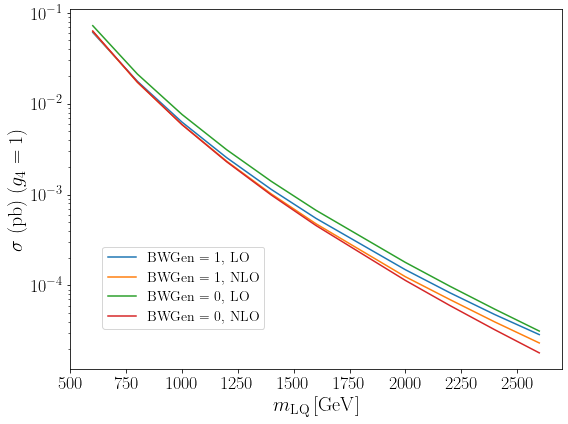

In [102]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(mlq_vals, bwgen1_LO,  color = 'C0', alpha = 1, label = r'BWGen = 1, LO ')
ax.plot(mlq_vals, bwgen1_NLO,  color = 'C1', alpha = 1, label = r'BWGen = 1, NLO') 

ax.plot(mlq_vals, bwgen0_LO,  color = 'C2', alpha = 1, label = r'BWGen = 0, LO ') #our bounds
ax.plot(mlq_vals, bwgen0_NLO,  color = 'C3', alpha = 1, label = r'BWGen = 0, NLO') #our bounds


ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $\sigma$ (pb) $(g_4 = 1)$ ", fontsize = 20)

ax.legend(loc=2, bbox_to_anchor=(0.05, 0.36), fontsize = 14)

ax.set_yscale("log")

fig.tight_layout()
#fig.savefig("param_space_limits_U1_bTau_betaR1.pdf")
plt.show()
plt.close()

Check the ratios:

In [103]:
for i_mlq, mlq in enumerate(mlq_vals):
    print(f'For the mass of {mlq}, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is {bwgen1_NLO[i_mlq]/bwgen0_NLO[i_mlq]}')

For the mass of 600, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 0.9885888260123521
For the mass of 800, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 0.9953595756983077
For the mass of 1000, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.00420429842855
For the mass of 1200, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.0153034226969604
For the mass of 1400, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.0285652536181642
For the mass of 1600, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.0456025771558866
For the mass of 2000, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.0977304404635397
For the mass of 2200, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.1638034435037767
For the mass of 2400, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.2192267230645413
For the mass of 2600, the ratio between BWGen = 1 and BWGen = 0 NLO x-sec is 1.2856575839196052


In [104]:
for i_mlq, mlq in enumerate(mlq_vals):
    print(f'For the mass of {mlq}, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is {bwgen1_LO[i_mlq]/bwgen0_LO[i_mlq]}')

For the mass of 600, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8428410014583951
For the mass of 800, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8318141112059577
For the mass of 1000, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8231724029647733
For the mass of 1200, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8174418575166967
For the mass of 1400, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8142633815449697
For the mass of 1600, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8147374600185858
For the mass of 2000, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8306031150289522
For the mass of 2200, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.847344164356116
For the mass of 2400, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.8725159504105237
For the mass of 2600, the ratio between BWGen = 1 and BWGen = 0 LO x-sec is 0.9138652145497409


Width corrections:

In [105]:
for i_mlq, mlq in enumerate(mlq_vals):
    print(f'For the mass of {mlq}, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is {bwgen1_NLO[i_mlq] - bwgen0_NLO[i_mlq]}')

For the mass of 600, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is -0.0007218320000000056
For the mass of 800, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is -8.03360000000003e-05
For the mass of 1000, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 2.4713900000000733e-05
For the mass of 1200, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 3.511550000000023e-05
For the mass of 1400, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 2.819472999999995e-05
For the mass of 1600, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 2.0801020000000008e-05
For the mass of 2000, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 1.1096839999999995e-05
For the mass of 2200, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 9.816218000000005e-06
For the mass of 2400, the difference between BWGen = 1 and BWGen = 0 NLO x-sec is 7.1308900000000025e-06
For the mass of 2600, the difference between BWGen = 1 and BW

In [106]:
for i_mlq, mlq in enumerate(mlq_vals):
    print(f'For the mass of {mlq}, the difference between BWGen = 1 and BWGen = 0 LO x-sec is {bwgen1_LO[i_mlq] - bwgen0_LO[i_mlq]}')

For the mass of 600, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -0.011381565000000003
For the mass of 800, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -0.003571111999999998
For the mass of 1000, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -0.0013469507999999998
For the mass of 1200, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -0.0005687751000000001
For the mass of 1400, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -0.00025955500000000007
For the mass of 1600, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -0.00012433362000000003
For the mass of 2000, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -3.035912000000002e-05
For the mass of 2200, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -1.4924111999999994e-05
For the mass of 2400, the difference between BWGen = 1 and BWGen = 0 LO x-sec is -6.986065999999998e-06
For the mass of 2600, the difference between BWGen = 1 and BWGen 

How do the NLO corrections compare in both cases, BWGen = 0, and BWGen = 1? 

First, BWGen = 0:

In [107]:
for i_mlq, mlq in enumerate(mlq_vals):
    print(f'For mLQ =  {mlq} GeV, NLO - LO for BWGen = 0 is {bwgen0_NLO[i_mlq] - bwgen0_LO[i_mlq]}')

For mLQ =  600 GeV, NLO - LO for BWGen = 0 is -0.009164108000000004
For mLQ =  800 GeV, NLO - LO for BWGen = 0 is -0.003920914999999997
For mLQ =  1000 GeV, NLO - LO for BWGen = 0 is -0.0017390651000000002
For mLQ =  1200 GeV, NLO - LO for BWGen = 0 is -0.0008209659000000002
For mLQ =  1400 GeV, NLO - LO for BWGen = 0 is -0.00041040693000000007
For mLQ =  1600 GeV, NLO - LO for BWGen = 0 is -0.00021498427000000005
For mLQ =  2000 GeV, NLO - LO for BWGen = 0 is -6.567350000000001e-05
For mLQ =  2200 GeV, NLO - LO for BWGen = 0 is -3.7836316999999995e-05
For mLQ =  2400 GeV, NLO - LO for BWGen = 0 is -2.2272063e-05
For mLQ =  2600 GeV, NLO - LO for BWGen = 0 is -1.3346629000000001e-05


In [108]:
for i_mlq, mlq in enumerate(mlq_vals):
    print(f'For mLQ =  {mlq} GeV, NLO - LO for BWGen = 1 is {bwgen1_NLO[i_mlq] - bwgen1_LO[i_mlq]}')

For mLQ =  600 GeV, NLO - LO for BWGen = 1 is 0.0014956249999999935
For mLQ =  800 GeV, NLO - LO for BWGen = 1 is -0.0004301389999999995
For mLQ =  1000 GeV, NLO - LO for BWGen = 1 is -0.00036740039999999963
For mLQ =  1200 GeV, NLO - LO for BWGen = 1 is -0.00021707529999999984
For mLQ =  1400 GeV, NLO - LO for BWGen = 1 is -0.00012265720000000004
For mLQ =  1600 GeV, NLO - LO for BWGen = 1 is -6.984963e-05
For mLQ =  2000 GeV, NLO - LO for BWGen = 1 is -2.421754e-05
For mLQ =  2200 GeV, NLO - LO for BWGen = 1 is -1.3095986999999996e-05
For mLQ =  2400 GeV, NLO - LO for BWGen = 1 is -8.155106999999998e-06
For mLQ =  2600 GeV, NLO - LO for BWGen = 1 is -5.480801999999999e-06


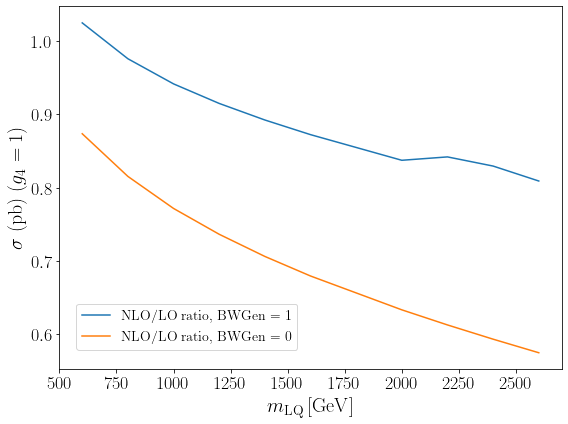

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(mlq_vals, [x/y for x,y in zip(bwgen1_NLO, bwgen1_LO)],  color = 'C0', alpha = 1, label = r'NLO/LO ratio, BWGen = 1 ')
ax.plot(mlq_vals, [x/y for x,y in zip(bwgen0_NLO, bwgen0_LO)],  color = 'C1', alpha = 1, label = r'NLO/LO ratio, BWGen = 0 ')



ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $\sigma$ (pb) $(g_4 = 1)$ ", fontsize = 20)

ax.legend(loc=2, bbox_to_anchor=(0.02, 0.2), fontsize = 14)

#ax.set_yscale("log")

fig.tight_layout()
#fig.savefig("param_space_limits_U1_bTau_betaR1.pdf")
plt.show()
plt.close()

Do the same for the scalar case, so we can compare:

In [110]:
[7.2420702e-02, 2.1233125e-02, 7.6173110e-03, 3.1155833e-03, 1.3974358e-03, 6.7112121e-04, 1.7921888e-04, 9.7763128e-05, 5.4799530e-05, 3.1411061e-05]

[0.072420702,
 0.021233125,
 0.007617311,
 0.0031155833,
 0.0013974358,
 0.00067112121,
 0.00017921888,
 9.7763128e-05,
 5.479953e-05,
 3.1411061e-05]

In [111]:
mlq_vals = [600, 800, 1000, 1200, 1400, 1600, 2000, 2200, 2400, 2600]
bwgen1_LO_scalar =  [6.1017874e-02, 1.7660276e-02, 6.2721967e-03, 2.5486349e-03, 1.1391812e-03, 5.4753538e-04, 1.4909851e-04, 8.3062129e-05, 4.7892857e-05, 2.8581770e-05]
bwgen1_NLO_scalar = [4.0635858e-02, 1.1870263e-02, 4.2352676e-03, 1.7243147e-03, 7.7002361e-04, 3.6904477e-04, 9.9267944e-05, 5.4451598e-05, 3.0539101e-05, 1.8067555e-05]

bwgen0_LO_scalar = [6.0483393e-02,1.7317708e-02,6.0747082e-03,2.4311852e-03,1.0673707e-03,5.0180569e-04,1.2838700e-04,6.8518646e-05,3.7555930e-05,2.1035766e-05]

bwgen0_NLO_scalar = [4.0607444e-02,1.1756229e-02,4.1531793e-03,1.6705708e-03,7.3627765e-04,3.4728721e-04,8.9329333e-05,4.7782099e-05,2.6245518e-05,1.4730739e-05]

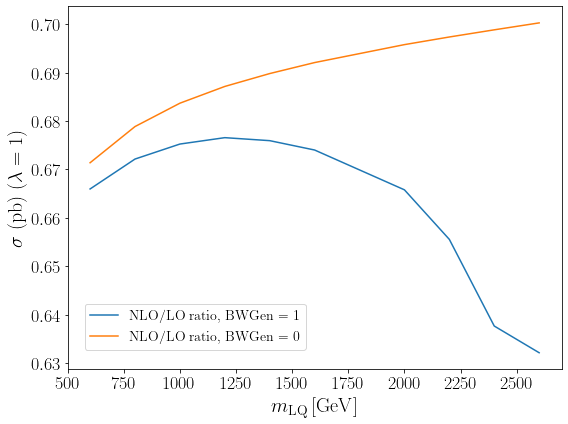

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(mlq_vals, [x/y for x,y in zip(bwgen1_NLO_scalar, bwgen1_LO_scalar)],  color = 'C0', alpha = 1, label = r'NLO/LO ratio, BWGen = 1 ')
ax.plot(mlq_vals, [x/y for x,y in zip(bwgen0_NLO_scalar, bwgen0_LO_scalar)],  color = 'C1', alpha = 1, label = r'NLO/LO ratio, BWGen = 0 ')



ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $\sigma$ (pb) $(\lambda = 1)$ ", fontsize = 20)

ax.legend(loc=2, bbox_to_anchor=(0.02, 0.2), fontsize = 14)

#ax.set_yscale("log")

fig.tight_layout()
#fig.savefig("param_space_limits_U1_bTau_betaR1.pdf")
plt.show()
plt.close()

Hm..

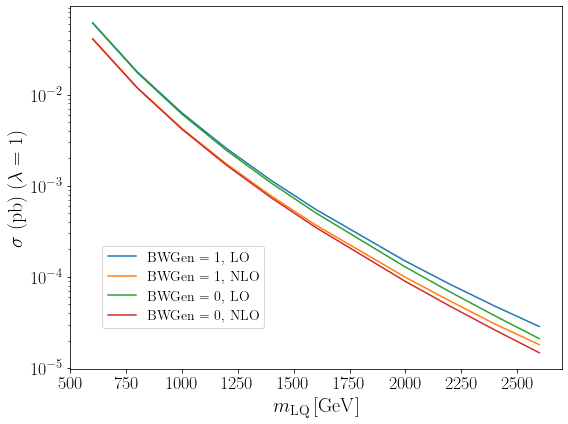

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(mlq_vals, bwgen1_LO_scalar,  color = 'C0', alpha = 1, label = r'BWGen = 1, LO ')
ax.plot(mlq_vals, bwgen1_NLO_scalar,  color = 'C1', alpha = 1, label = r'BWGen = 1, NLO') 

ax.plot(mlq_vals, bwgen0_LO_scalar,  color = 'C2', alpha = 1, label = r'BWGen = 0, LO ') #our bounds
ax.plot(mlq_vals, bwgen0_NLO_scalar,  color = 'C3', alpha = 1, label = r'BWGen = 0, NLO') #our bounds


ax.set_xlabel(r"$ m_{\mathrm{LQ}} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $\sigma$ (pb) $(\lambda = 1)$ ", fontsize = 20)

ax.legend(loc=2, bbox_to_anchor=(0.05, 0.36), fontsize = 14)

ax.set_yscale("log")

fig.tight_layout()
#fig.savefig("param_space_limits_U1_bTau_betaR1.pdf")
plt.show()
plt.close()

In [114]:
for x,y in zip(bwgen0_LO, bwgen0_LO_scalar):
    print(x/y)

1.197365068457717
1.2260932566826972
1.2539385842434374
1.281508006876646
1.3092319285136833
1.33741251519089
1.3959270019550267
1.4268105648205598
1.4591445345648477
1.4932216397539315


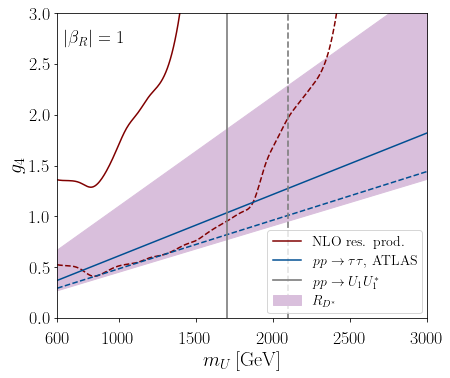

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(6.75, 5.75))
#fig, ax = plt.subplots(1, 1, figsize=(8, 6.5))

babyBlue = plt.cm.tab20c(1)
#The interpolated curves:
#ax.plot(mlq_masses_smooth[0:200], g4_limits_beta11_LO_13TeV_smooth(mlq_masses_smooth)[0:200],   color = lo_color, alpha = 1, linewidth = 2, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
ax.plot(mlq_masses_smooth[0:440], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440],  color = 'maroon', alpha = 1, linewidth = 1.5,  label = r'NLO res. prod.') #our bounds for betaL = betaR = 1

#ax.plot(mlq_masses_smooth, g4_limits_beta11_LO_14TeV_smooth(mlq_masses_smooth),   color = '#009DCF', linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'LO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
ax.plot(mlq_masses_smooth, g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth),  color = 'maroon', linestyle = 'dashed', linewidth = 1.5, alpha = 1) #our bounds

#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Bounds from other experiments:

x_plotting_lims = [600, 3000]

# $137 \mathrm{fb}^{-1}$

#pp \to \tau \tau - ATLAS
ax.plot(x_plotting_lims, ppTauTauATLAS_139_beta11(x_plotting_lims), color = nlo_color, linewidth = 1.5, linestyle = 'solid', label = r'$pp \to \tau \tau$, ATLAS')  #pp->tautau, 139 fb^-1, \beta_R = 1 
ax.plot(x_plotting_lims, ppTauTauATLAS_3000_beta11(x_plotting_lims), color = nlo_color, linewidth = 1.5, linestyle = 'dashed')  #pp->tautau, 3 ab^-1, \beta_R = 1

#pp \to \tau \tau - CMS
#ax.plot(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), color = '#116D6E', linestyle = 'solid', label = r'$pp \to \tau \tau$, CMS')  #pp->tautau, 139 fb^-1, \beta_R = 1 

#RD RDstar - to accommodate the anomaly
#ax.plot(x_plotting_lims,rD_upper_beta11(x_plotting_lims), linewidth = 2, color = 'maroon', linestyle = 'solid', label = r'$R_{D^\ast}$')
#ax.plot(x_plotting_lims,rD_lower_beta11(x_plotting_lims), linewidth = 2, color = 'maroon', linestyle = 'solid')


#pp \to U_1 \tau - Turn on if we want - But not sure if they are done properly
#ax.plot(mLQ_ppU1tau_137_CMS_beta11, ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), color = '#116D6E', label = r'$pp \to U_1 \tau$') #pp->U_1 \tau, single prod., CMS
#ax.plot(mLQ_ppU1tau_137_CMS_beta11, ((138/3000)**0.25)*(13./14)*ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), color = '#116D6E', linestyle = 'dashed') #pp->U_1 \tau, single prod., CMS

#pp \to U_1 U_1
ax.plot(mLQ_ppU1U1_139, gLQ_ppU1U1_139, color = 'gray', linewidth = 1.7, label = r'$pp \to U_1 U_1^\ast $', linestyle = 'solid') # pp -> U1 U1
ax.plot(mLQ_ppU1U1_3000, gLQ_ppU1U1_3000, color = 'gray', linewidth = 1.7, linestyle = 'dashed') # pp -> U1 U1 - 3 ab^-1

#ax.plot(x_plotting_lims, [4*np.pi, 4*np.pi], color = 'black', linestyle = 'dashed', label = r'$g_4 = 4 \pi$')


#Filling the plot

ax.fill_between(x_plotting_lims, rD_upper_beta11(x_plotting_lims), rD_lower_beta11(x_plotting_lims), color=purpleGinobetaR1, alpha = 1, label = r'$R_{D^\ast}$') #RD / RDstar
#ax.fill_between(mlq_masses_smooth[0:440], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = lo_color, alpha = 0.35) #For the NLO curve
#ax.fill_between([0, 1701], [0], [15], alpha = 0.2, color = 'gray') #For the pp -> U1 U1 bound
#ax.fill_between(x_plotting_lims, ppTauTauATLAS_139_beta11(x_plotting_lims), y2 = 3, color = '#d35400', alpha = 0.2) # pp -> tau tau ATLAS bounds
#ax.fill_between(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), y2 = 3, color = '#116D6E', alpha = 0.1) # pp -> tau tau CMS bounds

#Turn on the single LQ limits, but not certain if they are correct
#ax.fill_between(mLQ_ppU1tau_137_CMS_beta11, ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), y2 = 10, color = '#116D6E', alpha = 0.2)



#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600] + [1000 + i*500 for i in range(5)])
#ax.set_yticks([0.2, 0.3, 2, 4, 6, 8])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 3)
ax.set_yticks([int(0)] + [0.5, 1, 1.5, 2, 2.5, 3])
ax.text(x = 650, y = 2.7, s = r'$|\beta_R| = 1$', fontsize = 18)
ax.legend(loc=2, bbox_to_anchor=(0.55, 0.31), fontsize = 14)
#ax.legend(loc=2, bbox_to_anchor=(0.63, 0.28), fontsize = 14)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 



fig.tight_layout(pad=2.5)
#fig.savefig("param_space_limits_U1_bTau_beta11_withRD_var1.pdf")
plt.show()
plt.close()

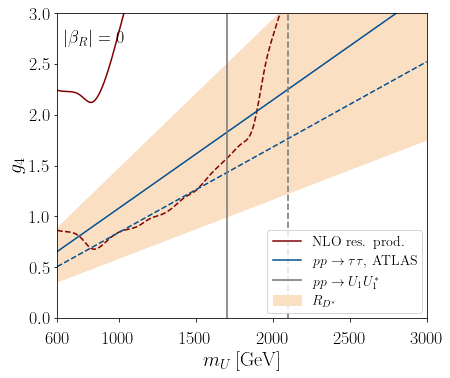

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(6.75, 5.75))
#fig, ax = plt.subplots(1, 1, figsize=(8, 6.5))

babyBlue = plt.cm.tab20c(1)
#The interpolated curves:
#ax.plot(mlq_masses_smooth[0:200], g4_limits_beta11_LO_13TeV_smooth(mlq_masses_smooth)[0:200],   color = lo_color, alpha = 1, linewidth = 2, label = r'LO,  $\mathcal{L} = 138 \, \mathrm{fb}^{-1}$') #our bounds for betaL = betaR = 1
ax.plot(mlq_masses_smooth[0:440], rescalefac*g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440],  color = 'maroon', alpha = 1, linewidth = 1.5,  label = r'NLO res. prod.') #our bounds for betaL = betaR = 1

#ax.plot(mlq_masses_smooth, g4_limits_beta11_LO_14TeV_smooth(mlq_masses_smooth),   color = '#009DCF', linestyle = 'dashed', linewidth = 2.25, alpha = 1, label = r'LO, $\mathcal{L} = 3 \, \mathrm{ab}^{-1}$') #our bounds
ax.plot(mlq_masses_smooth, rescalefac*g4_limits_beta11_NLO_14TeV_smooth(mlq_masses_smooth),  color = 'maroon', linestyle = 'dashed', linewidth = 1.5, alpha = 1) #our bounds

#ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
#ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax.set_xlabel(r"$ m_{U} \, [  \mathrm{GeV} ] $", fontsize = 20)
ax.set_ylabel(r" $g_4$ ", fontsize = 20)

#Bounds from other experiments:

x_plotting_lims = [600, 3000]

# $137 \mathrm{fb}^{-1}$

#pp \to \tau \tau - ATLAS
ax.plot(x_plotting_lims, ppTauTauATLAS_139_beta10(x_plotting_lims), color = nlo_color, linewidth = 1.5, linestyle = 'solid', label = r'$pp \to \tau \tau$, ATLAS')  #pp->tautau, 139 fb^-1, \beta_R = 1 
ax.plot(x_plotting_lims, ppTauTauATLAS_3000_beta10(x_plotting_lims), color = nlo_color, linewidth = 1.5, linestyle = 'dashed')  #pp->tautau, 3 ab^-1, \beta_R = 1

#pp \to \tau \tau - CMS
#ax.plot(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), color = '#116D6E', linestyle = 'solid', label = r'$pp \to \tau \tau$, CMS')  #pp->tautau, 139 fb^-1, \beta_R = 1 

#RD RDstar - to accommodate the anomaly
#ax.plot(x_plotting_lims,rD_upper_beta11(x_plotting_lims), linewidth = 2, color = 'maroon', linestyle = 'solid', label = r'$R_{D^\ast}$')
#ax.plot(x_plotting_lims,rD_lower_beta11(x_plotting_lims), linewidth = 2, color = 'maroon', linestyle = 'solid')


#pp \to U_1 \tau - Turn on if we want - But not sure if they are done properly
#ax.plot(mLQ_ppU1tau_137_CMS_beta11, ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), color = '#116D6E', label = r'$pp \to U_1 \tau$') #pp->U_1 \tau, single prod., CMS
#ax.plot(mLQ_ppU1tau_137_CMS_beta11, ((138/3000)**0.25)*(13./14)*ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), color = '#116D6E', linestyle = 'dashed') #pp->U_1 \tau, single prod., CMS

#pp \to U_1 U_1
ax.plot(mLQ_ppU1U1_139, gLQ_ppU1U1_139, color = 'gray', linewidth = 1.7, label = r'$pp \to U_1 U_1^\ast $', linestyle = 'solid') # pp -> U1 U1
ax.plot(mLQ_ppU1U1_3000, gLQ_ppU1U1_3000, color = 'gray', linewidth = 1.7, linestyle = 'dashed') # pp -> U1 U1 - 3 ab^-1

#ax.plot(x_plotting_lims, [4*np.pi, 4*np.pi], color = 'black', linestyle = 'dashed', label = r'$g_4 = 4 \pi$')


#Filling the plot

ax.fill_between(x_plotting_lims, rD_beta10_lower(x_plotting_lims), rD_beta10_upper(x_plotting_lims), color=orangeGinobetaR0, alpha = 1, label = r'$R_{D^\ast}$') #RD / RDstar
#ax.fill_between(mlq_masses_smooth[0:440], g4_limits_beta11_NLO_13TeV_smooth(mlq_masses_smooth)[0:440], y2 = 3, color = lo_color, alpha = 0.35) #For the NLO curve
#ax.fill_between([0, 1701], [0], [15], alpha = 0.2, color = 'gray') #For the pp -> U1 U1 bound
#ax.fill_between(x_plotting_lims, ppTauTauATLAS_139_beta11(x_plotting_lims), y2 = 3, color = '#d35400', alpha = 0.2) # pp -> tau tau ATLAS bounds
#ax.fill_between(x_plotting_lims, ppTauTauCMS_beta11(x_plotting_lims), y2 = 3, color = '#116D6E', alpha = 0.1) # pp -> tau tau CMS bounds

#Turn on the single LQ limits, but not certain if they are correct
#ax.fill_between(mLQ_ppU1tau_137_CMS_beta11, ppU1tau_137_CMS_beta11(mLQ_ppU1tau_137_CMS_beta11), y2 = 10, color = '#116D6E', alpha = 0.2)



#ax.set_title(r"CMS Recast")
#ax.text(-0.5, 35.5, r"Limits for the luminosity $\mathcal{L} = %d \mathrm{fb}^{-1}$" %int(lumi/1000), fontsize = 13)
ax.set_xticks([600] + [1000 + i*500 for i in range(5)])
#ax.set_yticks([0.2, 0.3, 2, 4, 6, 8])
#ax.text(2.5, 20., r'$\mu=100,\ \sigma=15$')
ax.set_xlim(x_plotting_lims[0], x_plotting_lims[1]) 
ax.set_ylim(0, 3)
ax.set_yticks([int(0)] + [0.5, 1, 1.5, 2, 2.5, 3])
ax.text(x = 650, y = 2.7, s = r'$|\beta_R| = 0$', fontsize = 18)
ax.legend(loc=2, bbox_to_anchor=(0.55, 0.31), fontsize = 14)
#ax.legend(loc=2, bbox_to_anchor=(0.63, 0.28), fontsize = 14)

plt.setp(ax.xaxis.get_majorticklabels(), position = (0, -0.02)) 
plt.setp(ax.yaxis.get_majorticklabels(), position = (0.00, 0)) 



fig.tight_layout(pad=2.5)
#fig.savefig("param_space_limits_U1_bTau_beta10_withRD_var1.pdf")
plt.show()
plt.close()